## Importing Libraries ##

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from ast import literal_eval
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from textblob import TextBlob
from collections import Counter
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install textblob

## Checking Working Directories ##

In [3]:
import os
print(os.getcwd())

C:\Users\Obinna J. Duruiheme\Customer Churn\Notebook


In [4]:
print(os.listdir())

['.ipynb_checkpoints', 'Customer Churn.ipynb']


## Loading Data ##

In [5]:
df = pd.read_excel("../Data/Dataset.xlsx")

## Exploring Dataset ##

In [6]:
df.head(2)

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03


In [7]:
df.tail(2)

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
12481,13482,Kristin Carey,26,Female,New Leah,josephcarter@example.net,001-335-464-3236x722,"72356 Teresa Rapid\nPorterborough, SC 40076",Segment A,"[{'Product': 'Sequins & Glitter', 'Frequency':...",...,"[{'Type': 'Call', 'Date': '2020-09-11'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 30...","{'PageViews': 63, 'TimeSpent(minutes)': 2}","[{'Action': 'Click', 'Page': 'post', 'Timestam...","{'Logins': 2, 'Frequency': 'Monthly'}","{'Rating': 5, 'Comment': 'Rest something conce...","[{'Email_Sent': '2021-09-05', 'Email_Opened': ...",0,0,2020-06-24 23:49:01
12482,13483,Melissa Carter,29,Male,West Amanda,regina88@example.net,816-238-9247,USCGC Lopez\nFPO AE 85542,Segment C,"[{'Product': 'Pool Brushes & Brooms', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-02-17'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 11...","{'PageViews': 93, 'TimeSpent(minutes)': 6}","[{'Action': 'Add to Cart', 'Page': 'category',...","{'Logins': 6, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Indeed foot trouble ...","[{'Email_Sent': '2021-02-08', 'Email_Opened': ...",2,1,2022-07-14 07:27:52


In [8]:
df.shape

(12483, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              12483 non-null  int64 
 1   Name                    12483 non-null  object
 2   Age                     12483 non-null  int64 
 3   Gender                  12483 non-null  object
 4   Location                12483 non-null  object
 5   Email                   12483 non-null  object
 6   Phone                   12483 non-null  object
 7   Address                 12483 non-null  object
 8   Segment                 12483 non-null  object
 9   PurchaseHistory         12483 non-null  object
 10  SubscriptionDetails     12483 non-null  object
 11  ServiceInteractions     12483 non-null  object
 12  PaymentHistory          12483 non-null  object
 13  WebsiteUsage            12483 non-null  object
 14  ClickstreamData         12483 non-null  object
 15  En

**Dataset Overview**

- **CustomerID:** A unique identifier for each customer.

- **Name:** The customer’s name.

- **Age:** The customer’s age.

- **Gender:** The customer’s gender.

- **Location:** The city or area where the customer resides.

- **Email:** The customer’s email address.

- **Phone:** The customer’s phone number.

- **Address:** The customer’s postal address.

- **Segment:** The category to which the customer belongs (e.g., Segment A, Segment B, Segment C).

- **PurchaseHistory:** A list detailing the customer’s purchases, including product names, frequency, and value.

- **Product:** Name of the product.

- **Frequency:** How often the product was purchased.

- **Value:** Cost of the product.

- **SubscriptionDetails:** Information about the customer’s subscription plan, including plan name, start date, and end date.

- **Plan:** Name of the subscription plan.

- **StartDate:** When the subscription started.

- **EndDate:** When the subscription ends.

- **ServiceInteractions:** Records of the customer’s interactions with customer service.

- **Type:** Interaction type (e.g., Call, Email, Chat).

- **Date:** Date of the interaction.

- **PaymentHistory:** Details about payment methods and any late payments.

- **Method:** Payment method (e.g., Credit Card, PayPal).

- **LatePayments:** Number of late payments.

- **WebsiteUsage:** Metrics related to the customer’s usage of a website or app, including page views and time spent.

- **PageViews:** Number of pages viewed.

- **TimeSpent:** Time spent on the website (in minutes).

- **ClickstreamData:** Actions taken by the customer on the website, like clicks and searches.

- **Action:** Type of action (e.g., Click, Search, Add to Cart).

- **Page:** Page where the action occurred.

- **Timestamp:** When the action took place.

- **EngagementMetrics:** Metrics related to customer engagement.

- **Logins:** Number of times the customer has logged in.

- **Frequency:** How often the customer logs in (Daily, Weekly, Monthly).

- **Feedback:** Customer feedback, including a rating and comments.

- **Rating:** A score from 1 to 5.

- **Comment:** Customer’s comments on their experience.

- **MarketingCommunication:** History of marketing communications with the customer.

- **EmailSent:** Date when an email was sent.

- **EmailOpened:** Date when the email was opened.

- **EmailClicked:** Date when the email was clicked.

- **NPS:** Net Promoter Score measuring customer loyalty (0 to 10).

- **ChurnLabel:** Indicates whether the customer has churned (1 for churn, 0 for no churn).

- **Timestamp:** When the data was recorded for the customer.

In [10]:
df.nunique()

CustomerID                12483
Name                      11617
Age                          53
Gender                        2
Location                   9255
Email                     12138
Phone                     12483
Address                   12483
Segment                       3
PurchaseHistory           12483
SubscriptionDetails       12472
ServiceInteractions       12467
PaymentHistory             6173
WebsiteUsage               6248
ClickstreamData           12483
EngagementMetrics            90
Feedback                  12483
MarketingCommunication    12479
NPS                          10
ChurnLabel                    2
Timestamp                 12482
dtype: int64

In [11]:
df.describe(include = 'all')

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
count,12483.00000,12483,12483.000000,12483,12483,12483,12483,12483,12483,12483,...,12483,12483,12483,12483,12483,12483,12483,12483.000000,12483.000000,12483
unique,NaN,11617,NaN,2,9255,12138,12483,12483,3,12483,...,12467,6173,6248,12483,90,12483,12479,NaN,NaN,12482
top,NaN,Michael Johnson,NaN,Male,Lake Michael,wsmith@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment C,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2020-03-26'}]","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 85, 'TimeSpent(minutes)': 3}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 1, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2022-12-26', 'Email_Opened': ...",NaN,NaN,2020-10-21 06:44:42
freq,NaN,6,NaN,6269,17,5,1,1,4199,1,...,2,42,9,1,167,1,2,NaN,NaN,2
mean,7242.00000,NaN,43.930065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.973884,0.505808,NaN
std,3603.67604,NaN,15.341521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.644623,0.499986,NaN
min,1001.00000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,4121.50000,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN
50%,7242.00000,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN
75%,10362.50000,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1.000000,NaN


In [12]:
df.describe()

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


## Exploratory Data Analysis ##

**Numerical columns**

In [13]:
df_numerical = df[['Age', 'NPS', 'ChurnLabel']]

In [14]:
corr = (df_numerical.corr())
corr

,Age,NPS,ChurnLabel
Age,1.000000,0.000006,0.010273
NPS,0.000006,1.000000,-0.540703
ChurnLabel,0.010273,-0.540703,1.000000


**Visualizing the relationship between Age, NPS and chun Label**

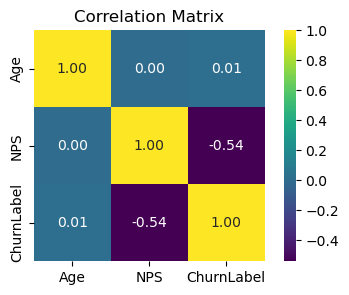

In [15]:
# Correlation Heatmap of numerical Columns
plt.figure(figsize=(5, 3))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

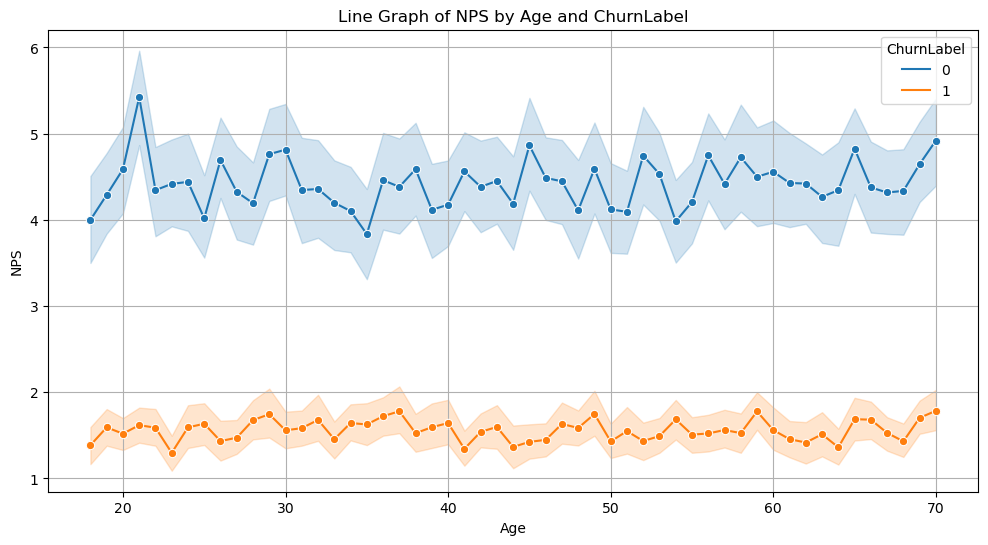

In [16]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Line plot for NPS by Age, colored by ChurnLabel
sns.lineplot(data=df_numerical, x='Age', y='NPS', hue='ChurnLabel', marker='o')

# Title and labels
plt.title('Line Graph of NPS by Age and ChurnLabel')
plt.xlabel('Age')
plt.ylabel('NPS')
plt.legend(title='ChurnLabel')
plt.grid()
plt.show()

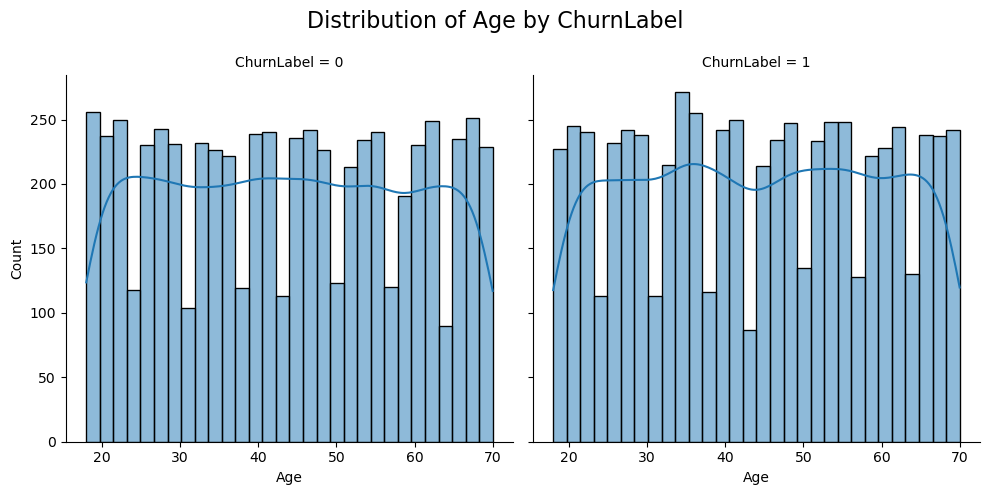

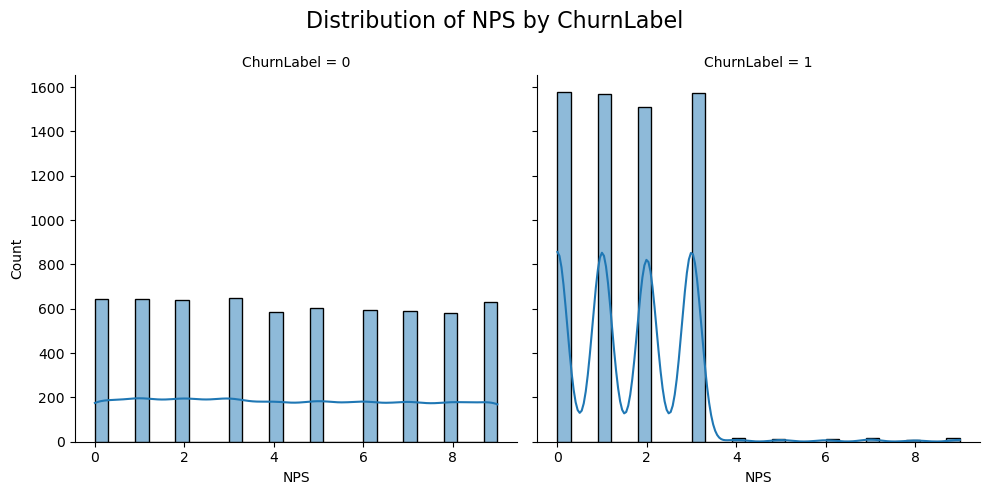

In [17]:
g = sns.FacetGrid(df_numerical, col='ChurnLabel', height=5)
g.map(sns.histplot, 'Age', bins=30, kde=True)
g.fig.suptitle('Distribution of Age by ChurnLabel', fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()

g = sns.FacetGrid(df_numerical, col='ChurnLabel', height=5)
g.map(sns.histplot, 'NPS', bins=30, kde=True)
g.fig.suptitle('Distribution of NPS by ChurnLabel', fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()

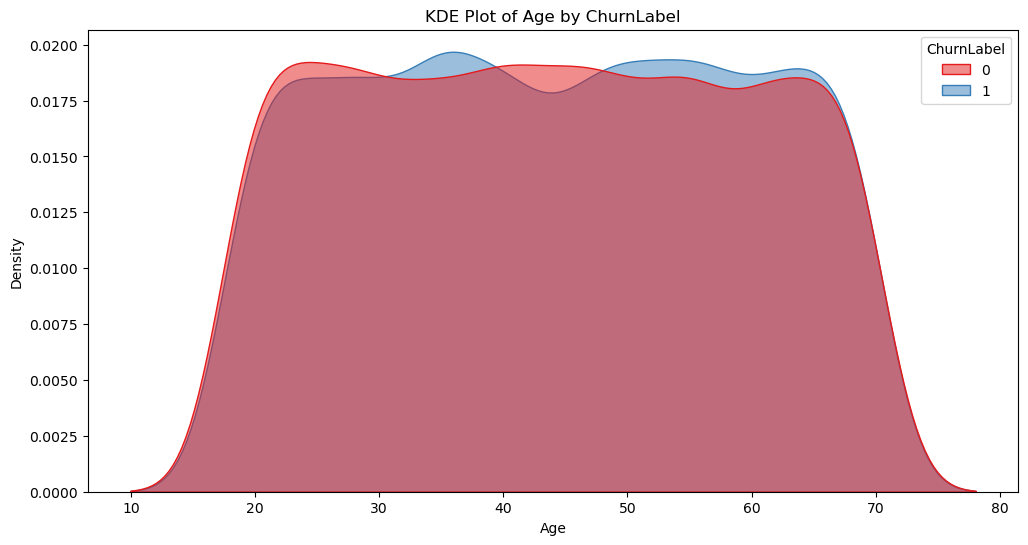

In [18]:
# KDE PLOT of Age and ChunLabel 
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_numerical, x='Age', hue='ChurnLabel', common_norm=False, fill=True, palette='Set1', alpha=0.5)
plt.title('KDE Plot of Age by ChurnLabel')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

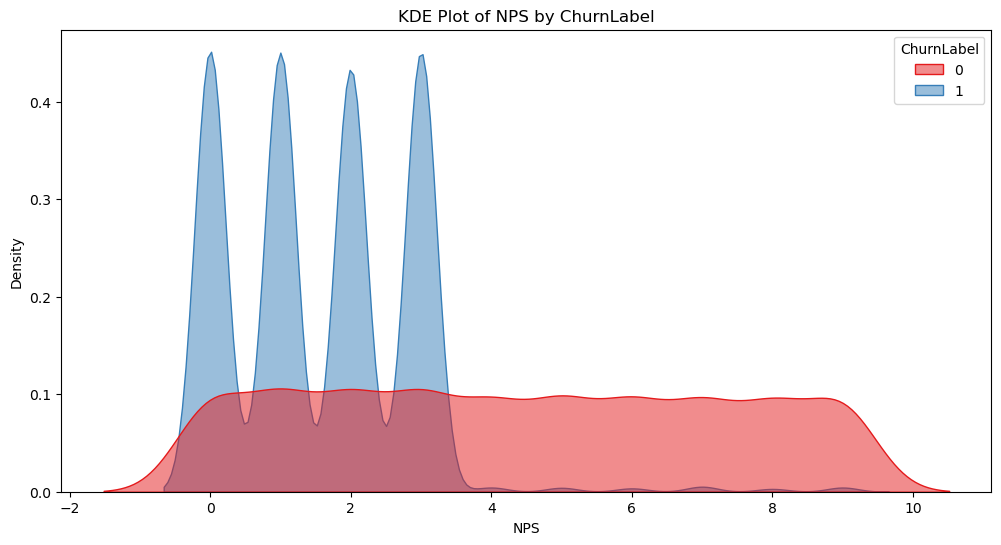

In [19]:
# KDE PLOT of NPS and ChunLabel 
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_numerical, x='NPS', hue='ChurnLabel', common_norm=False, fill=True, palette='Set1', alpha=0.5)
plt.title('KDE Plot of NPS by ChurnLabel')
plt.xlabel('NPS')
plt.ylabel('Density')
plt.show()

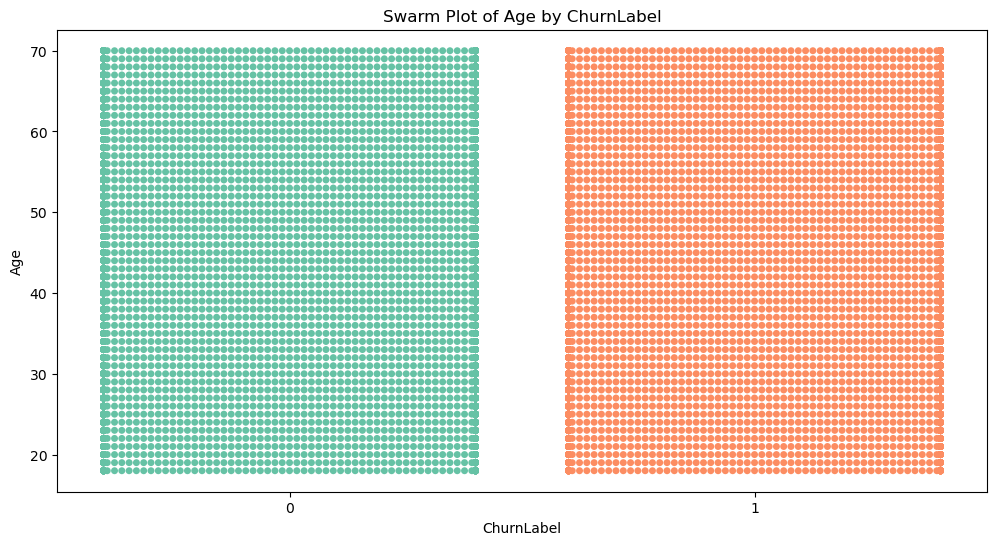

In [20]:
# Swarm Plot of Age by ChurnLabel
plt.figure(figsize=(12, 6))
sns.swarmplot(x='ChurnLabel', y='Age', data=df_numerical, palette='Set2')
plt.title('Swarm Plot of Age by ChurnLabel')
plt.show()

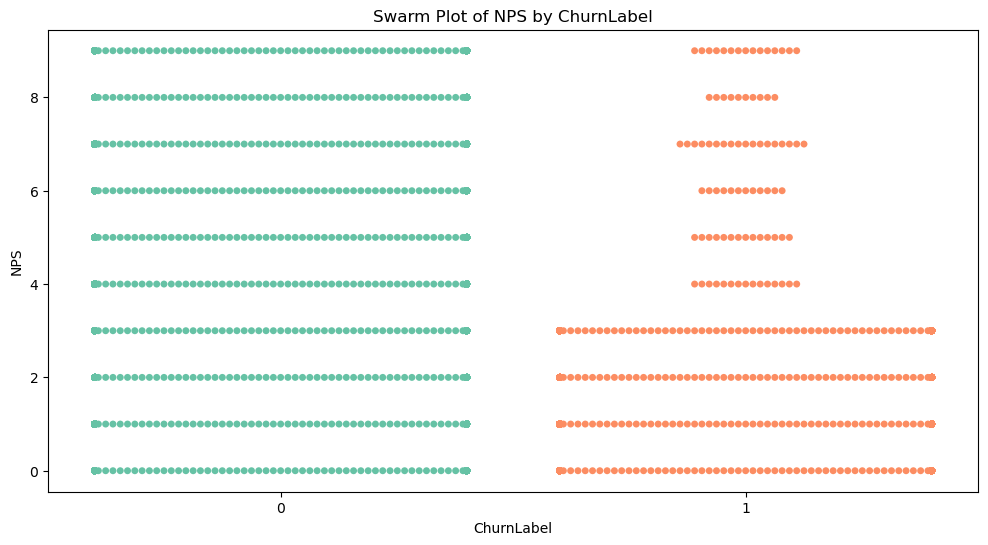

In [21]:
# Swarm Plot of NPS by ChurnLabel
plt.figure(figsize=(12, 6))
sns.swarmplot(x='ChurnLabel', y='NPS', data=df_numerical, palette='Set2')
plt.title('Swarm Plot of NPS by ChurnLabel')
plt.show()

**Exploring And Visualizing Age Column**

In [22]:
# Calculate min, max, mean, and std for ChurnLabel
Age_stats = df['Age'].agg(['min', 'max', 'mean', 'std'])

# Display the results
print(Age_stats)

min     18.000000
max     70.000000
mean    43.930065
std     15.341521
Name: Age, dtype: float64


<Figure size 500x300 with 0 Axes>

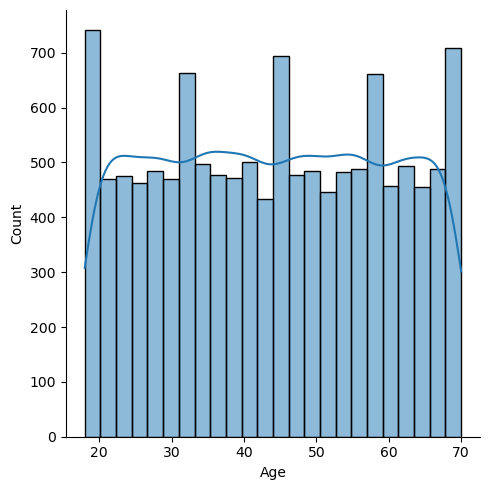

In [23]:
plt.figure(figsize=(5, 3))

sns.displot(df['Age'],kde = True)

****Exploring and visualizing NPS Column****

In [24]:
# Calculate min, max, mean, and std for ChurnLabel
NPS_stats = df['NPS'].agg(['min', 'max', 'mean', 'std'])

# Display the results
print(NPS_stats)

min     0.000000
max     9.000000
mean    2.973884
std     2.644623
Name: NPS, dtype: float64


<Figure size 500x300 with 0 Axes>

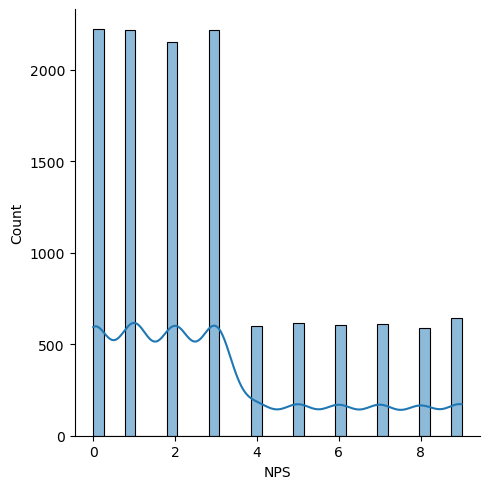

In [25]:
plt.figure(figsize=(5, 3))

sns.displot(df['NPS'],kde = True)

**Exploring And Visualizing ChurnLabel Column**

In [26]:
# Calculate min, max, mean, and std for ChurnLabel
Chun_Label_stats = df['ChurnLabel'].agg(['min', 'max', 'mean', 'std'])

# Display the results
print(Chun_Label_stats)

min     0.000000
max     1.000000
mean    0.505808
std     0.499986
Name: ChurnLabel, dtype: float64


<Figure size 500x300 with 0 Axes>

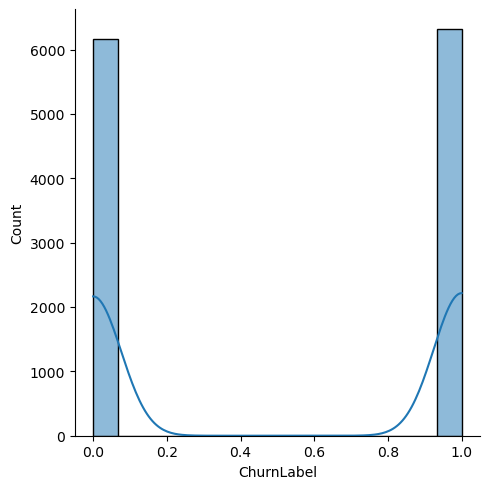

In [27]:
plt.figure(figsize=(5, 3))

sns.displot(df['ChurnLabel'],kde = True)

The dataset has a nearly equal number of customers who have churned (ChurnLabel=1) and those who haven't churned (ChurnLabel=0).

**Categorical Columns**

In [28]:
df_categorical = df[['Name',
                     'Gender',
                     'Location',
                     'Email',
                     'Address',
                     'Segment',
                     'PurchaseHistory',
                     'SubscriptionDetails',
                     'ServiceInteractions',
                     'PaymentHistory',
                     'WebsiteUsage',
                     'ClickstreamData',
                     'EngagementMetrics',
                     'Feedback',
                     'MarketingCommunication']]
df_categorical.head(2)

,Name,Gender,Location,Email,Address,Segment,PurchaseHistory,SubscriptionDetails,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication
0,Mark Barrett,Male,Andrewfort,allison74@example.net,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...","{'Plan': 'Express', 'Start_Date': '2020-06-08'...","[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ..."
1,Jeremy Welch,Female,Millerhaven,fmiller@example.com,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...","{'Plan': 'Pro', 'Start_Date': '2021-07-21', 'E...","[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ..."


In [29]:
df_categorical.loc[0].T

Name                                                           Mark Barrett
Gender                                                                 Male
Location                                                         Andrewfort
Email                                                 allison74@example.net
Address                   61234 Shelley Heights Suite 467\nCohentown, GU...
Segment                                                           Segment B
PurchaseHistory           [{'Product': 'Frozen Cocktail Mixes', 'Frequen...
SubscriptionDetails       {'Plan': 'Express', 'Start_Date': '2020-06-08'...
ServiceInteractions       [{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...
PaymentHistory            [{'Method': 'Credit Card', 'Late_Payments': 5}...
WebsiteUsage                    {'PageViews': 49, 'TimeSpent(minutes)': 15}
ClickstreamData           [{'Action': 'Add to Cart', 'Page': 'register',...
EngagementMetrics                     {'Logins': 19, 'Frequency': 'Weekly'}
Feedback    

**Exploring and visualizing Gender Column**

In [30]:
# Get unique genders and their counts
gender_counts = df['Gender'].value_counts()

# Display the results
unique_genders = gender_counts.index.tolist()
count_genders = gender_counts.values.tolist()

# Print unique genders and their counts
print("Unique Genders:", unique_genders)
print("Counts:", count_genders)

Unique Genders: ['Male', 'Female']
Counts: [6269, 6214]


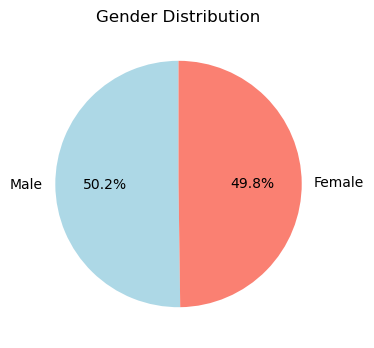

In [31]:
# Plotting a pie chart of Gender Column

plt.figure(figsize=(4, 4))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Gender Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

The number of male and female customers is almost equal.

**Exploring and visualizing Location Column**

In [32]:
df['Location'].nunique()

9255

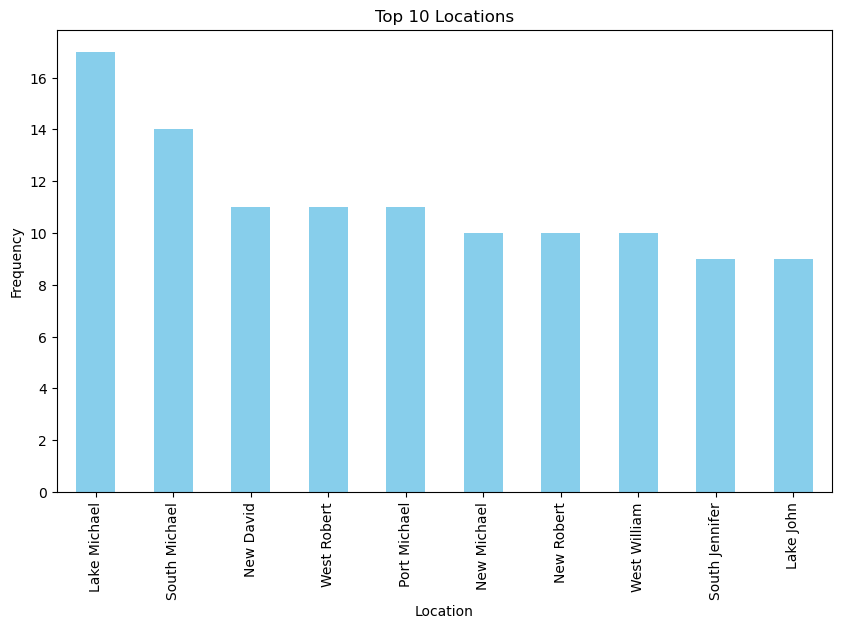

In [33]:
# The top 10 locations

top_n = 10  
top_locations = df['Location'].value_counts().head(top_n)

# Plotting
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

**Exploring and visualizing Segment Column**

In [34]:
# Get unique Segments and their counts
Segment_counts = df['Segment'].value_counts()

# Display the results
unique_Segments = Segment_counts.index.tolist()
count_Segments = Segment_counts.values.tolist()

# Print unique Segment and their counts
print("Unique Segment:", unique_Segments)
print("Counts:", count_Segments)

Unique Segment: ['Segment C', 'Segment A', 'Segment B']
Counts: [4199, 4157, 4127]


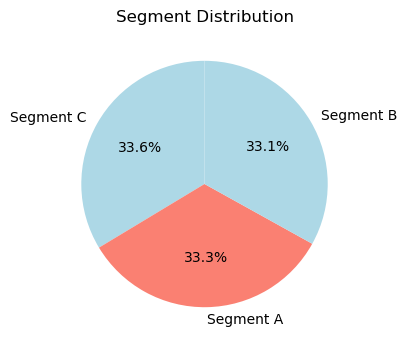

In [35]:
# Plotting a pie chart of Segment Column

plt.figure(figsize=(4, 4))
Segment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Segment Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

**Viewing the features inside PurchaseHistory, SubscriptionDetails, ServiceInteractions, PaymentHistory, WebsiteUsage, ClickstreamData, EngagementMetrics, Feedback, MarketingCommunication to see what could be extracted**

In [36]:
# print(df['PurchaseHistory'].loc[0])

In [37]:
# Convert the first entry if it's a string
PurchaseHistory_first = ast.literal_eval(df['PurchaseHistory'].loc[0])
PurchaseHistory_first 

[{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43},
 {'Product': 'Printer, Copier & Fax Machine Accessories',
  'Frequency': 7,
  'Value': 397.14},
 {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92},
 {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43},
 {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08},
 {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68},
 {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]

In [38]:
# Convert the first entry if it's a string
SubscriptionDetails_first = ast.literal_eval(df['SubscriptionDetails'].loc[0])
SubscriptionDetails_first 

{'Plan': 'Express', 'Start_Date': '2020-06-08', 'End_Date': '2022-10-27'}

In [39]:
# Convert the first entry if it's a string
ServiceInteractions_first = ast.literal_eval(df['ServiceInteractions'].loc[0])
ServiceInteractions_first 

[{'Type': 'Call', 'Date': '2019-09-26'},
 {'Type': 'Chat', 'Date': '2021-07-25'},
 {'Type': 'Email', 'Date': '2020-04-13'},
 {'Type': 'Chat', 'Date': '2020-11-15'}]

In [40]:
# Convert the first entry if it's a string
PaymentHistory_first = ast.literal_eval(df['PaymentHistory'].loc[0])
PaymentHistory_first 

[{'Method': 'Credit Card', 'Late_Payments': 5},
 {'Method': 'PayPal', 'Late_Payments': 11},
 {'Method': 'Bank Transfer', 'Late_Payments': 24}]

In [41]:
# Convert the first entry if it's a string
WebsiteUsage_first = ast.literal_eval(df['WebsiteUsage'].loc[0])
WebsiteUsage_first 

{'PageViews': 49, 'TimeSpent(minutes)': 15}

In [42]:
# Convert the first entry if it's a string
ClickstreamData_first = ast.literal_eval(df['ClickstreamData'].loc[0])
ClickstreamData_first 

[{'Action': 'Add to Cart',
  'Page': 'register',
  'Timestamp': '2020-09-13 17:06:44'},
 {'Action': 'Search', 'Page': 'login', 'Timestamp': '2022-03-30 14:51:52'},
 {'Action': 'Click', 'Page': 'about', 'Timestamp': '2019-11-10 05:48:48'},
 {'Action': 'Add to Cart',
  'Page': 'terms',
  'Timestamp': '2019-05-15 10:17:44'},
 {'Action': 'Add to Cart',
  'Page': 'author',
  'Timestamp': '2022-07-14 03:40:53'},
 {'Action': 'Search', 'Page': 'main', 'Timestamp': '2019-01-13 08:39:42'},
 {'Action': 'Add to Cart', 'Page': 'faq', 'Timestamp': '2019-02-19 05:28:25'},
 {'Action': 'Add to Cart',
  'Page': 'about',
  'Timestamp': '2020-11-01 20:59:55'},
 {'Action': 'Click', 'Page': 'faq', 'Timestamp': '2021-12-22 16:39:40'},
 {'Action': 'Add to Cart', 'Page': 'main', 'Timestamp': '2020-11-11 03:25:36'},
 {'Action': 'Click', 'Page': 'privacy', 'Timestamp': '2021-06-13 06:18:41'},
 {'Action': 'Add to Cart',
  'Page': 'search',
  'Timestamp': '2022-03-28 16:25:35'},
 {'Action': 'Search', 'Page': 'home

In [43]:
# Convert the first entry if it's a string
EngagementMetrics_first = ast.literal_eval(df['EngagementMetrics'].loc[0])
EngagementMetrics_first 

{'Logins': 19, 'Frequency': 'Weekly'}

In [44]:
# Convert the first entry if it's a string
Feedback_first = ast.literal_eval(df['Feedback'].loc[0])
Feedback_first 

{'Rating': 1,
 'Comment': 'I move baby go small big. Office institution six. Fact until hear technology right company seek.'}

In [45]:
# Convert the first entry if it's a string
MarketingCommunication_first = ast.literal_eval(df['MarketingCommunication'].loc[0])
MarketingCommunication_first 

[{'Email_Sent': '2019-10-17',
  'Email_Opened': '2022-01-12',
  'Email_Clicked': '2022-11-27'},
 {'Email_Sent': '2019-10-17',
  'Email_Opened': '2022-01-12',
  'Email_Clicked': '2022-11-27'},
 {'Email_Sent': '2019-10-17',
  'Email_Opened': '2022-01-12',
  'Email_Clicked': '2022-11-27'},
 {'Email_Sent': '2019-10-17',
  'Email_Opened': '2022-01-12',
  'Email_Clicked': '2022-11-27'},
 {'Email_Sent': '2019-10-17',
  'Email_Opened': '2022-01-12',
  'Email_Clicked': '2022-11-27'},
 {'Email_Sent': '2019-10-17',
  'Email_Opened': '2022-01-12',
  'Email_Clicked': '2022-11-27'},
 {'Email_Sent': '2019-10-17',
  'Email_Opened': '2022-01-12',
  'Email_Clicked': '2022-11-27'},
 {'Email_Sent': '2019-10-17',
  'Email_Opened': '2022-01-12',
  'Email_Clicked': '2022-11-27'}]

## Data Cleaning ##

In [46]:
# Check for Missing values 

df.isnull().sum()

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

In [47]:
# Check for Duplicates

df.duplicated().any()

False

**Convert TimeStamp to DateTime Format to Extract Month & Year**

In [48]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format = '%Y-%m-%d %H:%M:%S')

In [49]:
# Extract month-year

df['Month-Year'] = df['Timestamp'].dt.to_period('M')

In [50]:
# Group by Month-Year and calculate churn rates

churn_rates = df.groupby('Month-Year').agg(total_customers=('ChurnLabel', 'count'),churned_customers=('ChurnLabel', 'sum'))

churn_rates['churn_rate'] = churn_rates['churned_customers'] / churn_rates['total_customers']

# Display the churn rates
churn_rates.head(5)

,total_customers,churned_customers,churn_rate
Month-Year,,,
2019-01,272,132,0.485294
2019-02,263,139,0.528517
2019-03,251,139,0.553785
2019-04,263,130,0.494297
2019-05,252,124,0.492063


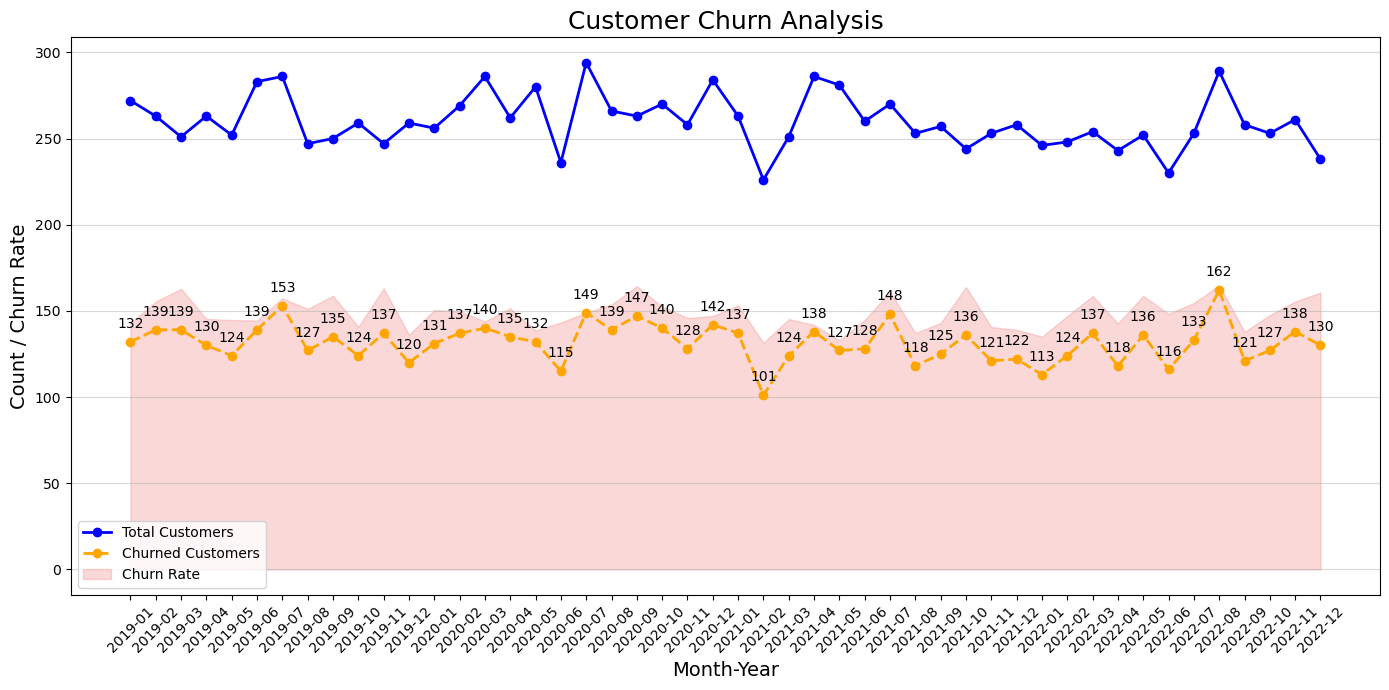

In [51]:
plt.figure(figsize=(14, 7))

# Plot total customers and churned customers as lines with styles
plt.plot(churn_rates.index.astype(str), churn_rates['total_customers'], marker='o', linestyle='-', color='blue', label='Total Customers', linewidth=2)
plt.plot(churn_rates.index.astype(str), churn_rates['churned_customers'], marker='o', linestyle='--', color='orange', label='Churned Customers', linewidth=2)

# Area plot for churn rate
plt.fill_between(churn_rates.index.astype(str), churn_rates['churn_rate'] * churn_rates['total_customers'].max(), 
                 color='lightcoral', alpha=0.3, label='Churn Rate')

# Adding labels and title
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Count / Churn Rate', fontsize=14)
plt.title('Customer Churn Analysis', fontsize=18)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.5)

# Annotate points for clarity
for x, y in zip(churn_rates.index.astype(str), churn_rates['churned_customers']):
    plt.annotate(f"{y}", xy=(x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

**Visualizing Churn rate over Time**

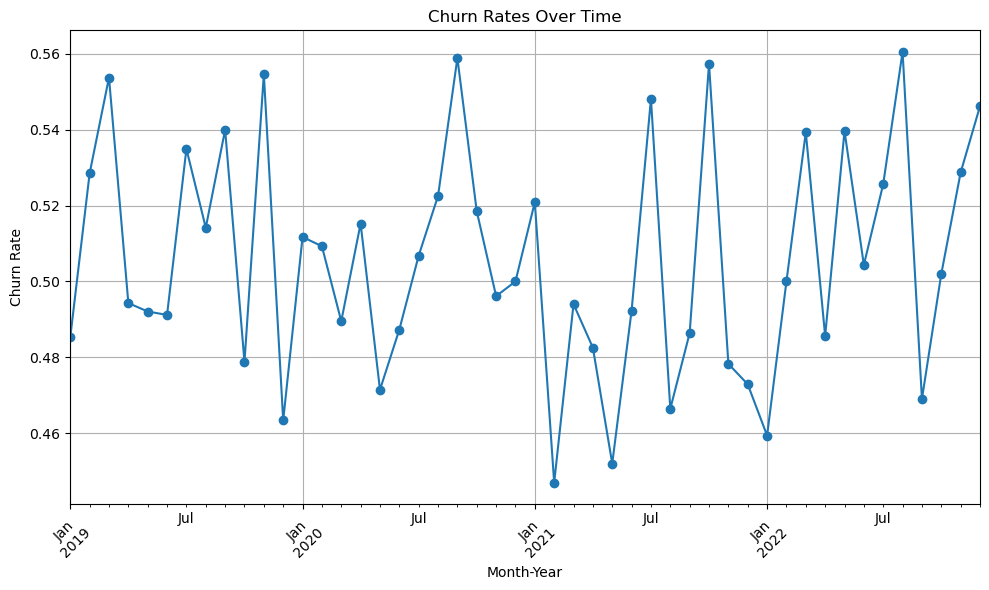

In [52]:
# Plotting churn rates over time

plt.figure(figsize=(10, 6))
churn_rates['churn_rate'].plot(marker='o')
plt.title('Churn Rates Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

**Extracting ratings from the Feedback column and adding a new column for them.**

In [53]:
df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'] if isinstance(x, str) else None)

**Establishing the connection between Feedback Ratings and Churn**

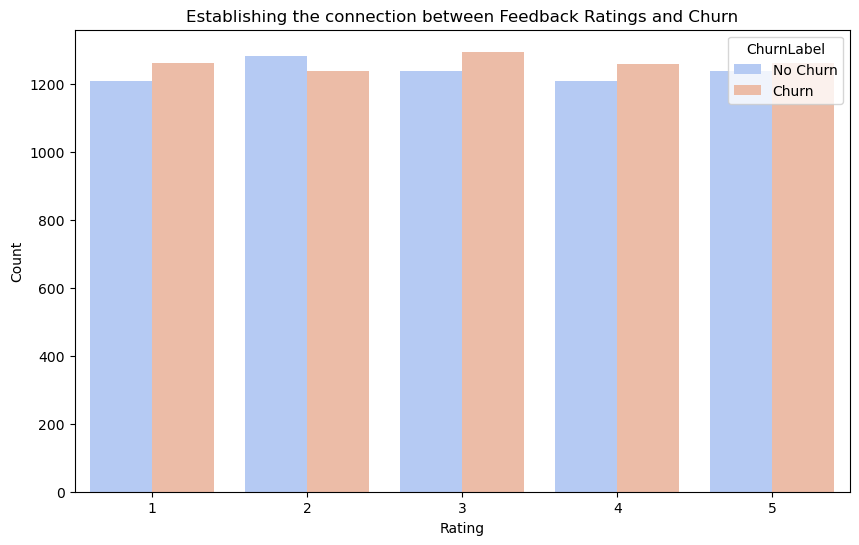

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FeedbackRating', hue='ChurnLabel', data=df, palette="coolwarm")
plt.title('Establishing the connection between Feedback Ratings and Churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

## Feature Engineering ##

**Grouping Columns for features extraction, then converting them to their appropriate data type using Python's literal_eval function**

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CustomerID              12483 non-null  int64         
 1   Name                    12483 non-null  object        
 2   Age                     12483 non-null  int64         
 3   Gender                  12483 non-null  object        
 4   Location                12483 non-null  object        
 5   Email                   12483 non-null  object        
 6   Phone                   12483 non-null  object        
 7   Address                 12483 non-null  object        
 8   Segment                 12483 non-null  object        
 9   PurchaseHistory         12483 non-null  object        
 10  SubscriptionDetails     12483 non-null  object        
 11  ServiceInteractions     12483 non-null  object        
 12  PaymentHistory          12483 non-null  object

In [56]:
# Define feature columns
feature_columns = ['PurchaseHistory',
                   'SubscriptionDetails',
                   'ServiceInteractions',
                   'PaymentHistory',
                   'WebsiteUsage',
                   'ClickstreamData',
                   'EngagementMetrics',
                   'Feedback',
                   'MarketingCommunication',
                   'ChurnLabel', 'Timestamp']

# Converting each feature column safely
for attribute in feature_columns:
    try:
        # Only apply literal_eval if the column is of type string
        if df[attribute].dtype == 'object':
            df[attribute] = df[attribute].apply(literal_eval)
    except Exception as e:
        print(f"Error converting {attribute}: {e}")

# Display the DataFrame to verify changes

# print(df.head())

**Extracting features from PurchaseHistory**

In [57]:
def get_purchased_products(purchase_history):
    return '|'.join(item['Product'] for item in purchase_history)

def get_purchase_frequency(purchase_history):
    return sum(item['Frequency'] for item in purchase_history)

def get_purchase_value(purchase_history):
    return sum(item['Value'] for item in purchase_history)

df['PurchasedProducts'] = df['PurchaseHistory'].apply(get_purchased_products)
df['PurchaseFrequency'] = df['PurchaseHistory'].apply(get_purchase_frequency)
df['PurchaseValue'] = df['PurchaseHistory'].apply(get_purchase_value)

In [58]:
df['PurchasedProducts']

0        Frozen Cocktail Mixes|Printer, Copier & Fax Ma...
1        Watercraft Polishes|Baby Protective Wear|Footbags
2        Vehicle Waxes, Polishes & Protectants|Pipe Cap...
3        Mouthwash|Crêpe & Blini Pans|Vehicle Performan...
4        Ice Cream Novelties|Fire Extinguisher & Equipm...
                               ...                        
12478    Ice Cream Novelties|Musical Instrument Amplifi...
12479                                        Straight Pins
12480    Furisode Kimonos|Cabbage|Golf Balls|Tripod Han...
12481    Sequins & Glitter|Video Game Arcade Cabinet Ac...
12482                                Pool Brushes & Brooms
Name: PurchasedProducts, Length: 12483, dtype: object

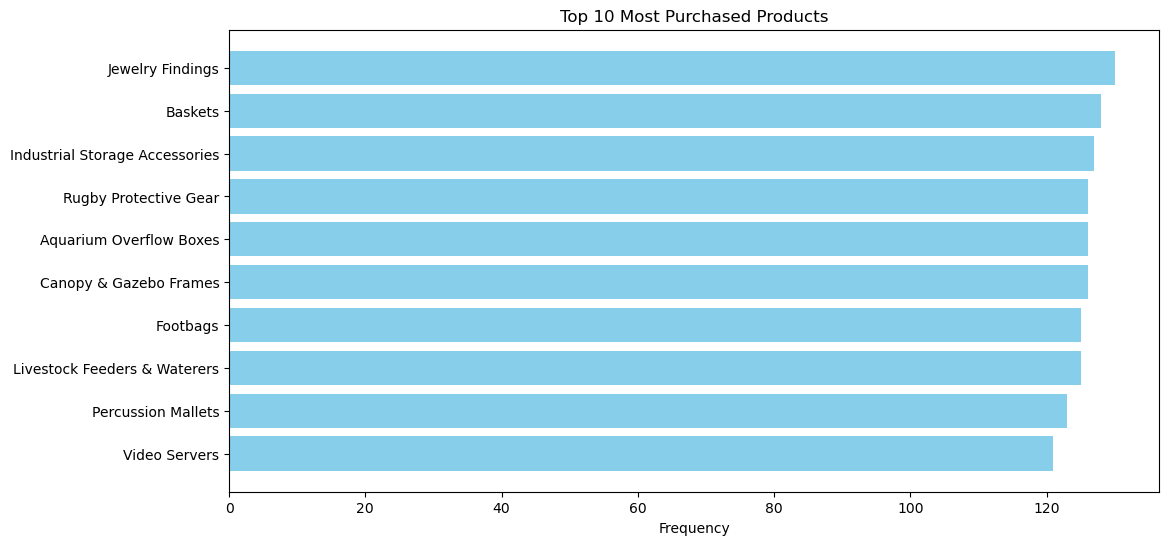

In [59]:
from collections import Counter

# Split the purchased products into a list
all_products = df['PurchasedProducts'].str.cat(sep='|').split('|')

# Count the frequency of each product
product_counts = Counter(all_products)

# Get the 10 most common products
most_common_products = product_counts.most_common(10)
products, counts = zip(*most_common_products)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(products, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Most Purchased Products')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()

In [60]:
df['PurchaseFrequency']

0        38
1         4
2        14
3        28
4        39
         ..
12478    14
12479     1
12480    63
12481    58
12482     1
Name: PurchaseFrequency, Length: 12483, dtype: int64

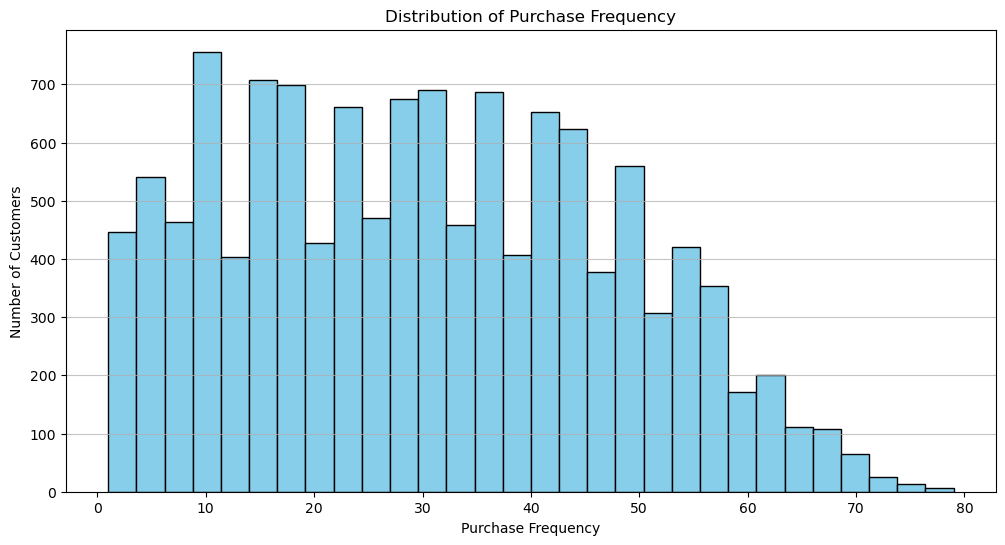

In [61]:
# Create a histogram of Purchase Frequency

plt.figure(figsize=(12, 6))
plt.hist(df['PurchaseFrequency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of Customers')
plt.title('Distribution of Purchase Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

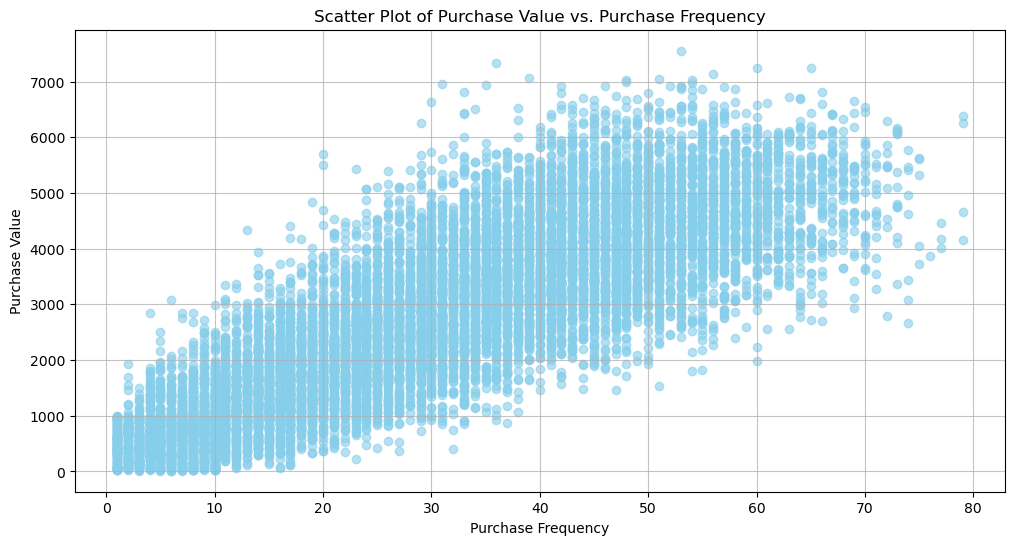

In [62]:
plt.figure(figsize=(12, 6))
plt.scatter(df['PurchaseFrequency'], df['PurchaseValue'], color='skyblue', alpha=0.6)
plt.xlabel('Purchase Frequency')
plt.ylabel('Purchase Value')
plt.title('Scatter Plot of Purchase Value vs. Purchase Frequency')
plt.grid(alpha=0.75)
plt.show()

In [63]:
df['PurchaseValue']

0        3994.72
1        2844.35
2        1866.52
3        1378.64
4        2425.05
          ...   
12478    1196.56
12479     710.57
12480    5154.42
12481    6055.16
12482     154.20
Name: PurchaseValue, Length: 12483, dtype: float64

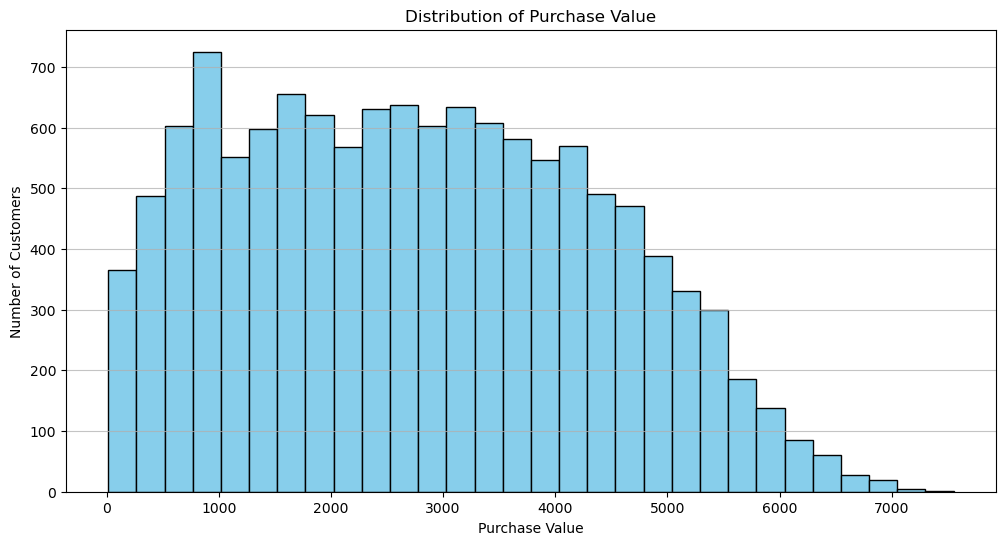

In [64]:
# A Histogram of Purchase Value

plt.figure(figsize=(12, 6))
plt.hist(df['PurchaseValue'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Purchase Value')
plt.ylabel('Number of Customers')
plt.title('Distribution of Purchase Value')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Extracting features from SubscriptionDetails**

In [65]:
def get_subscription_plan(subscription_details):
    return subscription_details.get('Plan', None)

def get_subscription_start_date(subscription_details):
    return subscription_details.get('Start_Date', None)

def get_subscription_end_date(subscription_details):
    return subscription_details.get('End_Date', None)

def calculate_subscription_duration(start_date, end_date):
    if pd.notnull(start_date) and pd.notnull(end_date):
        return (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days
    return None

df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(get_subscription_plan)
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(get_subscription_start_date)
df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(get_subscription_end_date)
df['SubscriptionDuration'] = df.apply(lambda row: calculate_subscription_duration(row['SubscriptionStartDate'], row['SubscriptionEndDate']), axis=1)

In [66]:
df['SubscriptionPlan']

0          Express
1              Pro
2        Essential
3            Smart
4            Basic
           ...    
12478    Essential
12479         Flex
12480       Deluxe
12481         Gold
12482        Prime
Name: SubscriptionPlan, Length: 12483, dtype: object

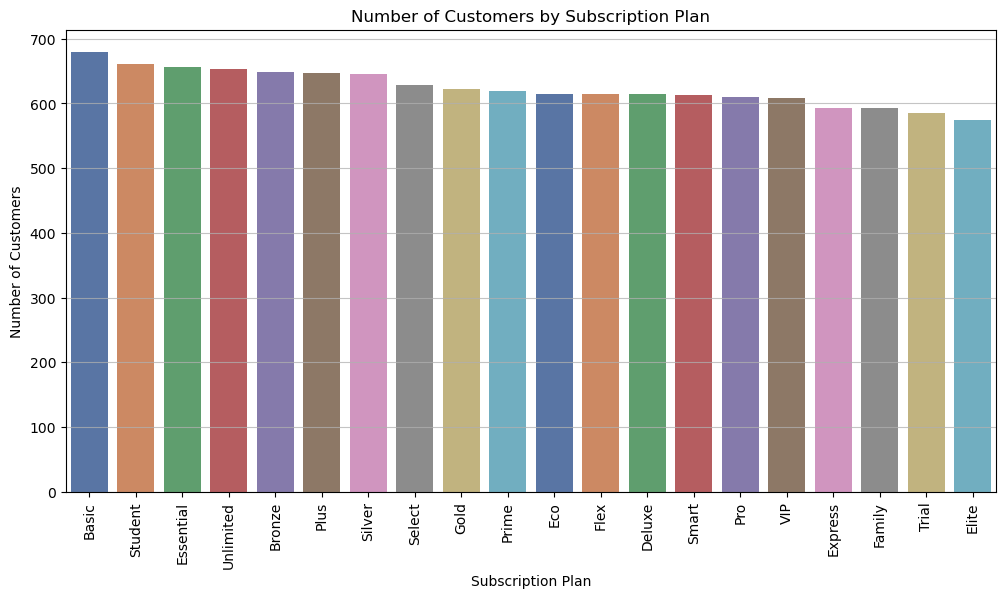

In [67]:
# Count the frequency of each subscription plan
subscription_counts = df['SubscriptionPlan'].value_counts()


# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=subscription_counts.index, y=subscription_counts.values, palette='deep')
plt.xlabel('Subscription Plan')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Subscription Plan')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)
plt.show()

In [68]:
df['SubscriptionStartDate']

0        2020-06-08
1        2021-07-21
2        2019-10-05
3        2020-01-14
4        2021-04-08
            ...    
12478    2019-06-15
12479    2022-12-10
12480    2021-07-04
12481    2020-07-21
12482    2021-08-20
Name: SubscriptionStartDate, Length: 12483, dtype: object

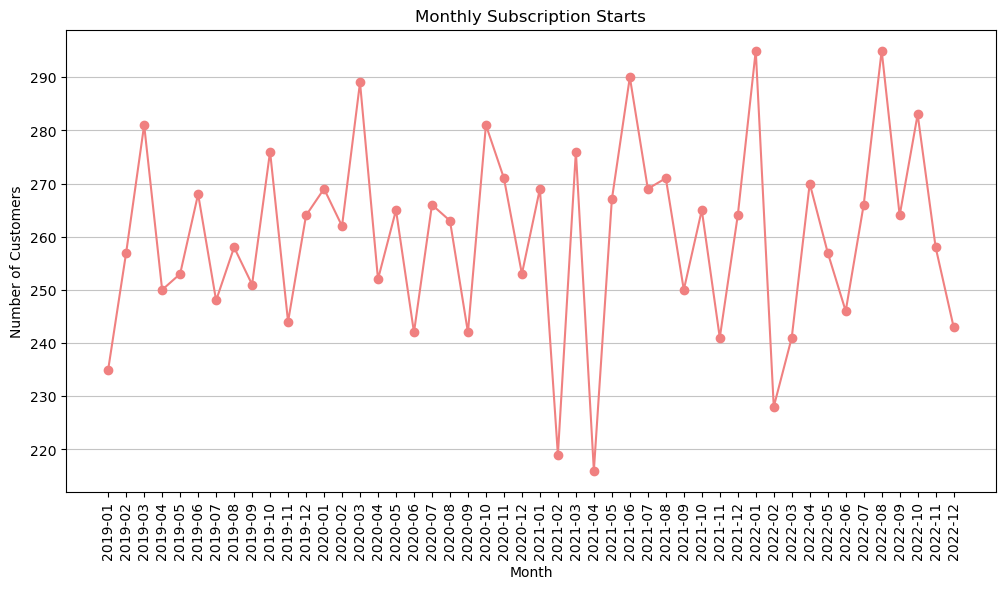

In [69]:
# SubscriptionStartDate in datetime format
df['SubscriptionStartDate'] = pd.to_datetime(df['SubscriptionStartDate'], errors='coerce')


# new column for the month
df['SubscriptionMonth'] = df['SubscriptionStartDate'].dt.to_period('M')


# number of subscriptions started each month
monthly_subscriptions = df['SubscriptionMonth'].value_counts().sort_index()


# Creating a line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_subscriptions.index.astype(str), monthly_subscriptions.values, marker='o', color='lightcoral')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Monthly Subscription Starts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)
plt.show()

In [70]:
df['SubscriptionEndDate']

0        2022-10-27
1        2022-05-07
2        2020-08-19
3        2022-03-27
4        2022-11-09
            ...    
12478    2021-06-29
12479    2022-12-28
12480    2021-07-24
12481    2021-11-17
12482    2022-05-13
Name: SubscriptionEndDate, Length: 12483, dtype: object

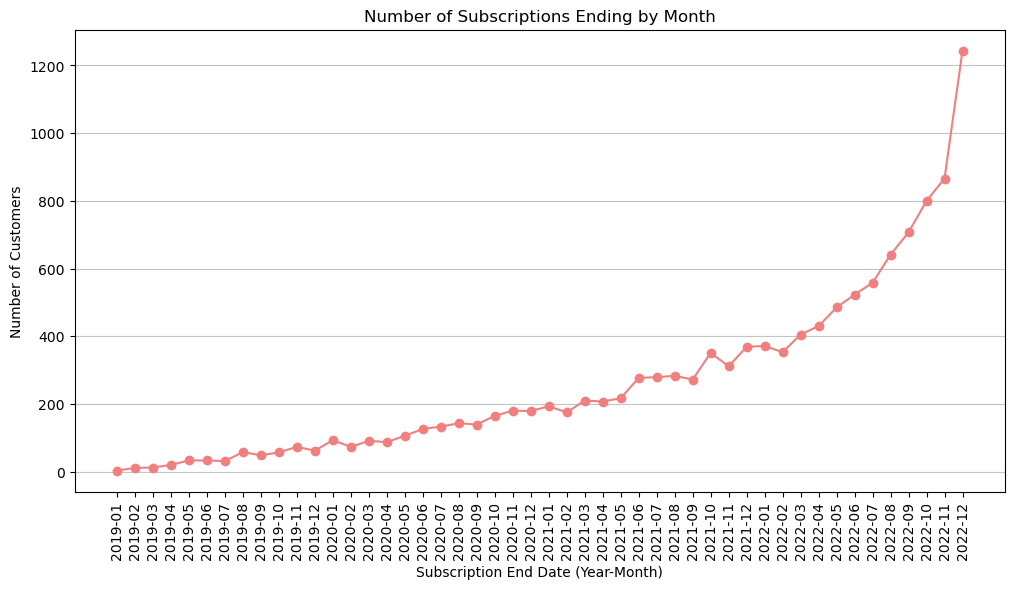

In [71]:
df['SubscriptionEndDate'] = pd.to_datetime(df['SubscriptionEndDate'], errors='coerce')

# Extracting year and month for grouping
df['YearMonth'] = df['SubscriptionEndDate'].dt.to_period('M')


# Count the number of subscriptions ending each month
end_date_counts = df['YearMonth'].value_counts().sort_index()


# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(end_date_counts.index.astype(str), end_date_counts.values, marker='o', color='lightcoral')
plt.xlabel('Subscription End Date (Year-Month)')
plt.ylabel('Number of Customers')
plt.title('Number of Subscriptions Ending by Month')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)
plt.show()

In [72]:
df['SubscriptionDuration']

0        871
1        290
2        319
3        803
4        580
        ... 
12478    745
12479     18
12480     20
12481    484
12482    266
Name: SubscriptionDuration, Length: 12483, dtype: int64

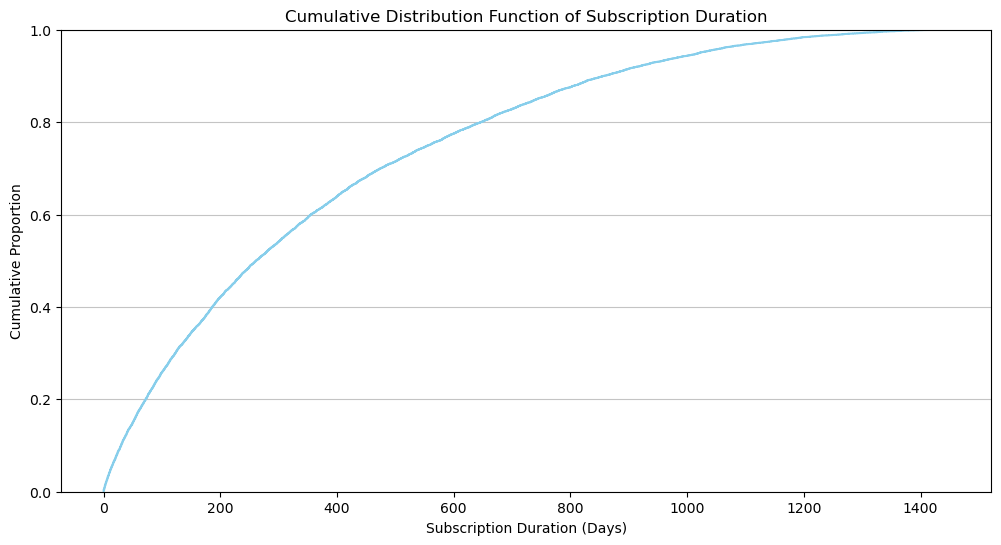

In [73]:
plt.figure(figsize=(12, 6))
sns.ecdfplot(df['SubscriptionDuration'], color='skyblue')
plt.xlabel('Subscription Duration (Days)')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Distribution Function of Subscription Duration')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Extracting features from ServiceInteractions**

In [74]:
# Extract unique service interaction types from the ServiceInteractions column
def get_unique_service_interaction_types(service_interactions):
    types = set()
    for interactions in service_interactions:
        for interaction in interactions:
            types.add(interaction['Type'])
    return list(types)


# Applying the function to the DataFrame and get unique types
unique_service_interaction_types = get_unique_service_interaction_types(df['ServiceInteractions'])


# Print the unique service interaction types
print('All unique Service Interaction Types:', unique_service_interaction_types)

All unique Service Interaction Types: ['Call', 'Email', 'Chat']


In [75]:
# Functions to count interaction types
def count_interaction_type(service_interactions, interaction_type):
    count = 0
    if isinstance(service_interactions, list):
        count = sum(1 for interaction in service_interactions if interaction['Type'] == interaction_type)
    else:
        print(f"Expected list but got: {type(service_interactions)}")
    return count


# Create new columns for counts
df['EmailCount'] = df['ServiceInteractions'].apply(lambda x: count_interaction_type(x, 'Email'))
df['ChatCount'] = df['ServiceInteractions'].apply(lambda x: count_interaction_type(x, 'Chat'))
df['CallCount'] = df['ServiceInteractions'].apply(lambda x: count_interaction_type(x, 'Call'))


# Display the updated DataFrame with counts
print(df[['CustomerID', 'EmailCount', 'ChatCount', 'CallCount']].head())

   CustomerID  EmailCount  ChatCount  CallCount
0        1001           1          2          1
1        1002          10          4          5
2        1003           1          1          1
3        1004          18         24         17
4        1005           5          1          4


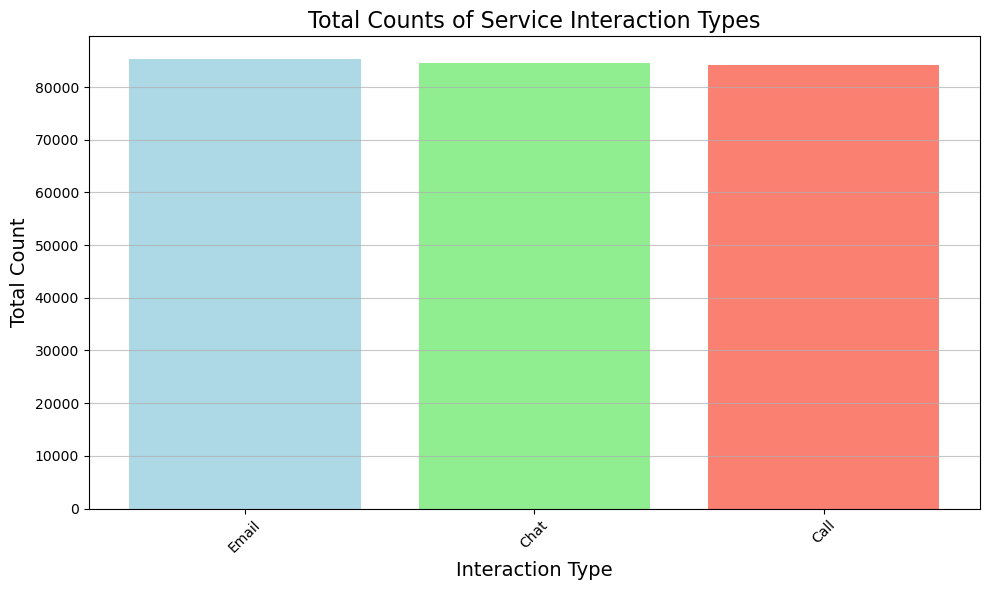

In [76]:
# Summing up counts for visualization
total_counts = {
    'Email': df['EmailCount'].sum(),
    'Chat': df['ChatCount'].sum(),
    'Call': df['CallCount'].sum()
}


# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_counts.keys(), total_counts.values(), color=['lightblue', 'lightgreen', 'salmon'])
plt.xlabel('Interaction Type', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.title('Total Counts of Service Interaction Types', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

**Extracting features from PaymentHistory**

In [77]:
# Extract unique payment history methods from the PaymentHistory column
def get_unique_payment_methods(payment_history):
    methods = set()
    for history in payment_history:
        for payment in history:
            methods.add(payment['Method'])
    return list(methods)


# Apply the function to the DataFrame and get unique methods
unique_payment_methods = get_unique_payment_methods(df['PaymentHistory'])


# Print the unique payment history methods
print('All unique Payment History Methods:', unique_payment_methods)

All unique Payment History Methods: ['PayPal', 'Bank Transfer', 'Credit Card']


In [78]:
def count_payment_method(payment_history, payment_method):
    count = 0
    if isinstance(payment_history, list):
        count = sum(1 for payment in payment_history if payment['Method'] == payment_method)
    else:
        print(f"Expected list but got: {type(payment_history)}")
    return count



# Create new columns for counts
df['Bank TransferCount'] = df['PaymentHistory'].apply(lambda x: count_payment_method(x, 'Bank Transfer'))
df['Credit CardCount'] = df['PaymentHistory'].apply(lambda x: count_payment_method(x, 'Credit Card'))
df['PayPalCount'] = df['PaymentHistory'].apply(lambda x: count_payment_method(x, 'PayPal'))



# Display the updated DataFrame with counts
print(df[['CustomerID', 'Bank TransferCount', 'Credit CardCount', 'PayPalCount']].head())

   CustomerID  Bank TransferCount  Credit CardCount  PayPalCount
0        1001                   1                 1            1
1        1002                   1                 1            1
2        1003                   1                 1            1
3        1004                   1                 1            1
4        1005                   1                 1            1


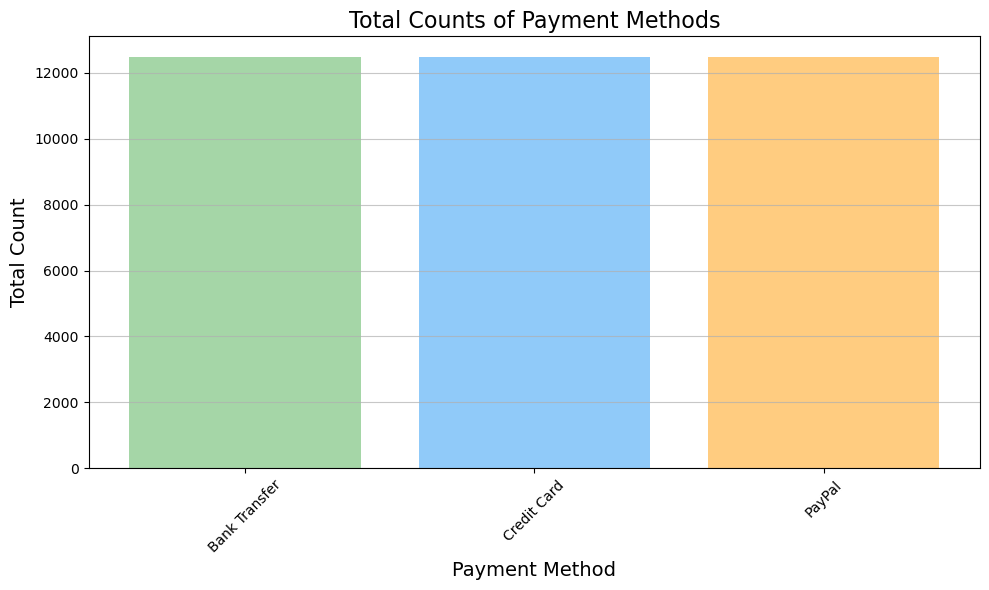

In [79]:
# Summing up counts for visualization
total_payment_counts = {
    'Bank Transfer': df['Bank TransferCount'].sum(),
    'Credit Card': df['Credit CardCount'].sum(),
    'PayPal': df['PayPalCount'].sum()
}



# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_payment_counts.keys(), total_payment_counts.values(), color=['#A5D6A7', '#90CAF9', '#FFCC80'])  # Light Green, Light Blue, Light Orange
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.title('Total Counts of Payment Methods', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

In [80]:
# Function to get payment methods as a string
def get_payment_methods(payment_history):
    return '|'.join(item['Method'] for item in payment_history)



# Function to get total late payments
def get_total_late_payments(payment_history):
    return sum(item['Late_Payments'] for item in payment_history)



# Apply functions to extract payment history metrics
df['PaymentMethods'] = df['PaymentHistory'].apply(get_payment_methods)
df['TotalLatePayments'] = df['PaymentHistory'].apply(get_total_late_payments)



# Display the updated DataFrame with new columns
print(df[['CustomerID', 'PaymentMethods', 'TotalLatePayments']].head())

   CustomerID                    PaymentMethods  TotalLatePayments
0        1001  Credit Card|PayPal|Bank Transfer                 40
1        1002  Credit Card|PayPal|Bank Transfer                 10
2        1003  Credit Card|PayPal|Bank Transfer                  8
3        1004  Credit Card|PayPal|Bank Transfer                 79
4        1005  Credit Card|PayPal|Bank Transfer                  2


   CustomerID                    PaymentMethods  TotalLatePayments
0        1001  Credit Card|PayPal|Bank Transfer                 40
1        1002  Credit Card|PayPal|Bank Transfer                 10
2        1003  Credit Card|PayPal|Bank Transfer                  8
3        1004  Credit Card|PayPal|Bank Transfer                 79
4        1005  Credit Card|PayPal|Bank Transfer                  2


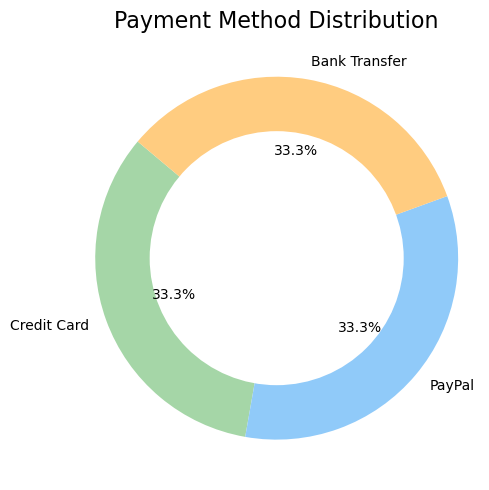

In [81]:
# Display the updated DataFrame with new columns
print(df[['CustomerID', 'PaymentMethods', 'TotalLatePayments']].head())


# Preparing data for the doughnut chart
payment_counts = df['PaymentMethods'].str.split('|').explode().value_counts()
labels = payment_counts.index
sizes = payment_counts.values


# Create a doughnut chart
plt.figure(figsize=(5, 5))


# Create a pie chart with a hole in the middle
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#A5D6A7', '#90CAF9', '#FFCC80'])


# Draw a circle at the center of the pie to create a doughnut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Payment Method Distribution', fontsize=16)
plt.tight_layout()
plt.show()

**Extracting features from website_usage**

In [82]:
# Function to get total page views
def get_total_page_views(website_usage):
    if isinstance(website_usage, dict):
        return website_usage.get('PageViews', 0)
    return 0


# Function to get total time spent
def get_total_time_spent(website_usage):
    if isinstance(website_usage, dict):
        return website_usage.get('TimeSpent(minutes)', 0)
    return 0


# Apply functions to extract website usage metrics
df['TotalPageViews'] = df['WebsiteUsage'].apply(get_total_page_views)
df['TotalTimeSpent'] = df['WebsiteUsage'].apply(get_total_time_spent)


# Display the updated DataFrame with new columns
print(df[['CustomerID', 'TotalPageViews', 'TotalTimeSpent']].head())

   CustomerID  TotalPageViews  TotalTimeSpent
0        1001              49              15
1        1002             100               9
2        1003               1              97
3        1004              25              31
4        1005              77              51


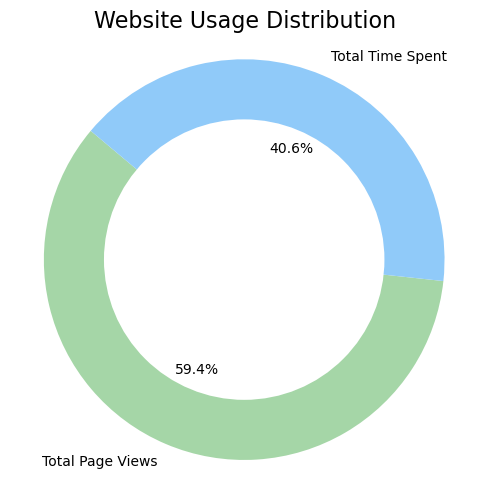

In [83]:
# Preparing data for the doughnut chart
total_page_views = df['TotalPageViews'].sum()
total_time_spent = df['TotalTimeSpent'].sum()


# Data for the pie chart
labels = ['Total Page Views', 'Total Time Spent']
sizes = [total_page_views, total_time_spent]


# Create a doughnut chart
plt.figure(figsize=(5, 5))


# Create a pie chart with a hole in the middle
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#A5D6A7', '#90CAF9'])


# Draw a circle at the center of the pie to create a doughnut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Website Usage Distribution', fontsize=16)
plt.tight_layout()
plt.show()

**Extracting features from ClickstreamData**

In [84]:
# Function to get all actions as a string
def get_all_actions(clickstream_data):
    return '|'.join(item['Action'] for item in clickstream_data)

# Function to get the frequency of a specific action
def get_action_frequency(clickstream_data, action):
    if isinstance(clickstream_data, list):
        return sum(1 for item in clickstream_data if item['Action'] == action)
    return 0

# Apply functions to extract clickstream metrics
df['AllActions'] = df['ClickstreamData'].apply(get_all_actions)
df['AddToCartCount'] = df['ClickstreamData'].apply(lambda x: get_action_frequency(x, 'Add to Cart'))
df['SearchCount'] = df['ClickstreamData'].apply(lambda x: get_action_frequency(x, 'Search'))
df['ClickCount'] = df['ClickstreamData'].apply(lambda x: get_action_frequency(x, 'Click'))

# Display the updated DataFrame with new columns
print(df[['AllActions', 'AddToCartCount', 'SearchCount', 'ClickCount']])

                                              AllActions  AddToCartCount  \
0      Add to Cart|Search|Click|Add to Cart|Add to Ca...               8   
1      Add to Cart|Add to Cart|Search|Search|Click|Ad...               8   
2      Search|Add to Cart|Search|Click|Search|Click|C...               2   
3      Click|Search|Click|Add to Cart|Search|Search|C...              15   
4      Click|Click|Add to Cart|Click|Add to Cart|Clic...              17   
...                                                  ...             ...   
12478  Add to Cart|Add to Cart|Add to Cart|Search|Add...               4   
12479  Search|Add to Cart|Search|Click|Search|Click|C...               3   
12480  Search|Click|Add to Cart|Add to Cart|Add to Ca...              10   
12481  Click|Click|Click|Click|Click|Add to Cart|Clic...               7   
12482  Add to Cart|Search|Search|Click|Add to Cart|Cl...              13   

       SearchCount  ClickCount  
0               12           4  
1                7   

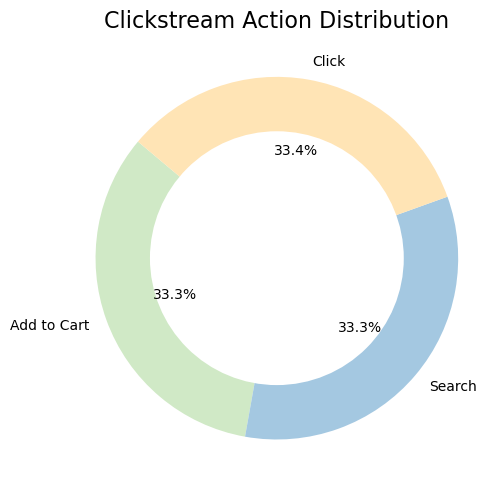

In [85]:
# Summing up counts for visualization
total_actions = {
    'Add to Cart': df['AddToCartCount'].sum(),
    'Search': df['SearchCount'].sum(),
    'Click': df['ClickCount'].sum()
}

# Preparing data for the doughnut chart
labels = total_actions.keys()
sizes = total_actions.values()


# Create a doughnut chart
plt.figure(figsize=(5, 5))


# Create a pie chart with a hole in the middle
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#D0E9C6', '#A4C8E1', '#FFE4B5'])


# Draw a circle at the center of the pie to create a doughnut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Clickstream Action Distribution', fontsize=16)
plt.tight_layout()
plt.show()

**Extracting features from EngagementMetrics**

In [86]:
# Function to extract the number of logins
def get_logins(engagement_metrics):
    return engagement_metrics.get('Logins', 0)

# Function to extract the frequency of engagement
def get_frequency(engagement_metrics):
    return engagement_metrics.get('Frequency', '')

# Apply functions to extract engagement metrics
df['Logins'] = df['EngagementMetrics'].apply(get_logins)
df['EngagementFrequency'] = df['EngagementMetrics'].apply(get_frequency)

# Display the updated DataFrame with new columns
print(df[['Logins', 'EngagementFrequency']])

       Logins EngagementFrequency
0          19              Weekly
1           9              Weekly
2          19             Monthly
3           4               Daily
4          12              Weekly
...       ...                 ...
12478      22               Daily
12479      25              Weekly
12480       9             Monthly
12481       2             Monthly
12482       6              Weekly

[12483 rows x 2 columns]


**Extracting features from feedback**

In [87]:
# Function to extract the rating
def get_rating(feedback):
    return feedback.get('Rating', 0)

# Function to extract the comment
def get_comment(feedback):
    return feedback.get('Comment', '')

# Apply functions to extract feedback metrics
df['Rating'] = df['Feedback'].apply(get_rating)
df['Comment'] = df['Feedback'].apply(get_comment)

# Display the updated DataFrame with new columns
print(df[['Rating', 'Comment']])

       Rating                                            Comment
0           1  I move baby go small big. Office institution s...
1           2  Wish what bag cut life. Statement might opport...
2           4  Some Democrat guess but short. Whether behind ...
3           1  Yard feel never miss ask billion Congress. Fly...
4           3  Ten determine unit interview challenge stock. ...
...       ...                                                ...
12478       2              Light appear fight lawyer where star.
12479       3  Yet very girl history. Thing late dream you re...
12480       5  Offer particularly single degree seem sound. S...
12481       5  Rest something concern likely movie. Foot in i...
12482       3  Indeed foot trouble heavy agreement cut. West ...

[12483 rows x 2 columns]


**Extracting features from MarketingCommunication**

In [88]:
# Function to count total emails sent
def get_email_sent_count(marketing_data):
    return len(marketing_data)

# Function to count total emails opened
def get_email_opened_count(marketing_data):
    return sum(1 for item in marketing_data if item['Email_Opened'] is not None)

# Function to count total emails clicked
def get_email_clicked_count(marketing_data):
    return sum(1 for item in marketing_data if item['Email_Clicked'] is not None)

# Apply functions to extract marketing communication metrics
df['EmailsSentCount'] = df['MarketingCommunication'].apply(get_email_sent_count)
df['EmailsOpenedCount'] = df['MarketingCommunication'].apply(get_email_opened_count)
df['EmailsClickedCount'] = df['MarketingCommunication'].apply(get_email_clicked_count)

# Display the updated DataFrame with new columns
print(df[['EmailsSentCount', 'EmailsOpenedCount', 'EmailsClickedCount']])

       EmailsSentCount  EmailsOpenedCount  EmailsClickedCount
0                    8                  8                   8
1                    9                  9                   9
2                    8                  8                   8
3                   10                 10                  10
4                    7                  7                   7
...                ...                ...                 ...
12478                4                  4                   4
12479                7                  7                   7
12480                5                  5                   5
12481                1                  1                   1
12482                5                  5                   5

[12483 rows x 3 columns]


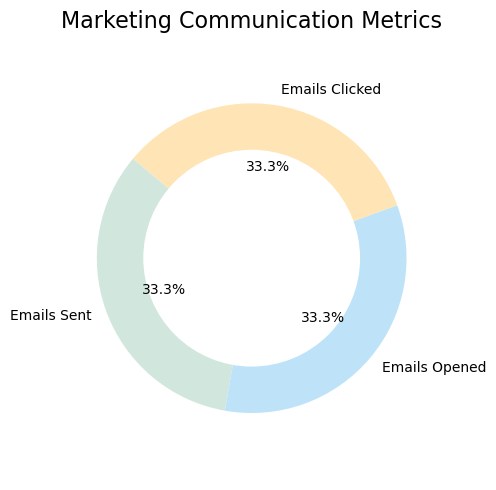

In [89]:
# Preparing data for the doughnut chart
total_sent = df['EmailsSentCount'].sum()
total_opened = df['EmailsOpenedCount'].sum()
total_clicked = df['EmailsClickedCount'].sum()

# Data for the pie chart
labels = ['Emails Sent', 'Emails Opened', 'Emails Clicked']
sizes = [total_sent, total_opened, total_clicked]


# Create a doughnut chart
plt.figure(figsize=(5, 5))


# Create a pie chart with a hole in the middle
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#D1E7DD', '#BEE3F8', '#FFE4B5'])


# Draw a circle at the center of the pie to create a doughnut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Marketing Communication Metrics', fontsize=16)
plt.tight_layout()
plt.show()

**Extracting Features From Timestamp** 

In [90]:
# Convert to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract features
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Weekday'] = df['Timestamp'].dt.weekday

# Display the updated DataFrame with new columns
print(df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Weekday']])

       Year  Month  Day  Hour  Minute  Weekday
0      2020      1   27     1      36        0
1      2019      1    6    18      30        6
2      2019      4   30     4      25        1
3      2020      3    3    17      33        1
4      2019      4    5    22      42        4
...     ...    ...  ...   ...     ...      ...
12478  2022      1   27     0      27        3
12479  2020      6   14    23       4        6
12480  2020     10   13    15       9        1
12481  2020      6   24    23      49        2
12482  2022      7   14     7      27        3

[12483 rows x 6 columns]


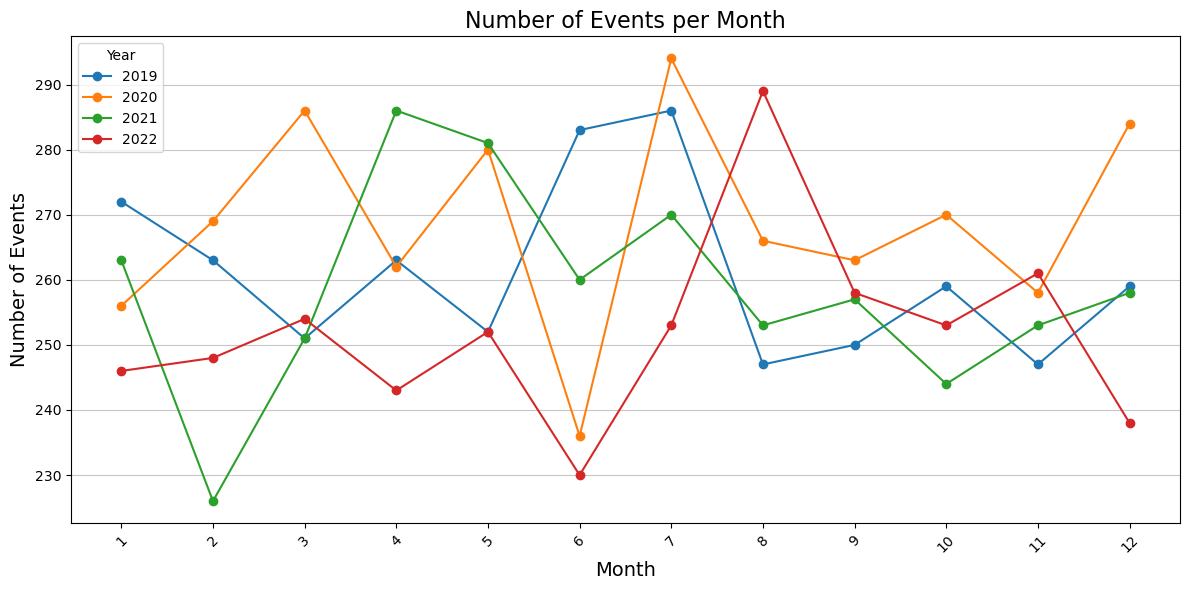

In [91]:
# Prepare data for visualization
monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Counts')

# Create a line plot
plt.figure(figsize=(12, 6))
for year in monthly_counts['Year'].unique():
    plt.plot(
        monthly_counts[monthly_counts['Year'] == year]['Month'],
        monthly_counts[monthly_counts['Year'] == year]['Counts'],
        marker='o',
        label=str(year)
    )

# Add labels and title
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
plt.title('Number of Events per Month', fontsize=16)
plt.xticks(range(1, 13))  # Month labels
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

**Extracting Customer Lifetime Value (CLV)**

In [92]:
# Customer Lifetime Value (CLV)

# Remove whitespace from column names
df.columns = df.columns.str.strip()

# Now calculate CLV
df['CLV'] = df.groupby('CustomerID')['PurchaseValue'].transform('sum')
df['CLV']

0        3994.72
1        2844.35
2        1866.52
3        1378.64
4        2425.05
          ...   
12478    1196.56
12479     710.57
12480    5154.42
12481    6055.16
12482     154.20
Name: CLV, Length: 12483, dtype: float64

**Extracting RFM From the DataFrame**

In [93]:
# Recency, Frequency, Monetary (RFM) Metrics

df['LastPurchaseDate'] = df.groupby('CustomerID')['Timestamp'].transform('max')

# Recency
df['Recency'] = (pd.Timestamp.now() - df['LastPurchaseDate']).dt.days

# Frequency
df['Frequency'] = df.groupby('CustomerID')['PurchaseValue'].transform('count')

# Monetary
df['Monetary'] = df.groupby('CustomerID')['PurchaseValue'].transform('sum')


# Display the updated DataFrame with new columns
print(df[['LastPurchaseDate', 'Recency', 'Frequency', 'Monetary']])

         LastPurchaseDate  Recency  Frequency  Monetary
0     2020-01-27 01:36:49     1957          1   3994.72
1     2019-01-06 18:30:03     2343          1   2844.35
2     2019-04-30 04:25:10     2229          1   1866.52
3     2020-03-03 17:33:28     1921          1   1378.64
4     2019-04-05 22:42:22     2253          1   2425.05
...                   ...      ...        ...       ...
12478 2022-01-27 00:27:28     1226          1   1196.56
12479 2020-06-14 23:04:47     1817          1    710.57
12480 2020-10-13 15:09:13     1697          1   5154.42
12481 2020-06-24 23:49:01     1807          1   6055.16
12482 2022-07-14 07:27:52     1058          1    154.20

[12483 rows x 4 columns]


       CustomerID  Recency  Frequency  Monetary
0            1001     1957          1   3994.72
1            1002     2343          1   2844.35
2            1003     2229          1   1866.52
3            1004     1921          1   1378.64
4            1005     2253          1   2425.05
...           ...      ...        ...       ...
12478       13479     1226          1   1196.56
12479       13480     1817          1    710.57
12480       13481     1697          1   5154.42
12481       13482     1807          1   6055.16
12482       13483     1058          1    154.20

[12483 rows x 4 columns]


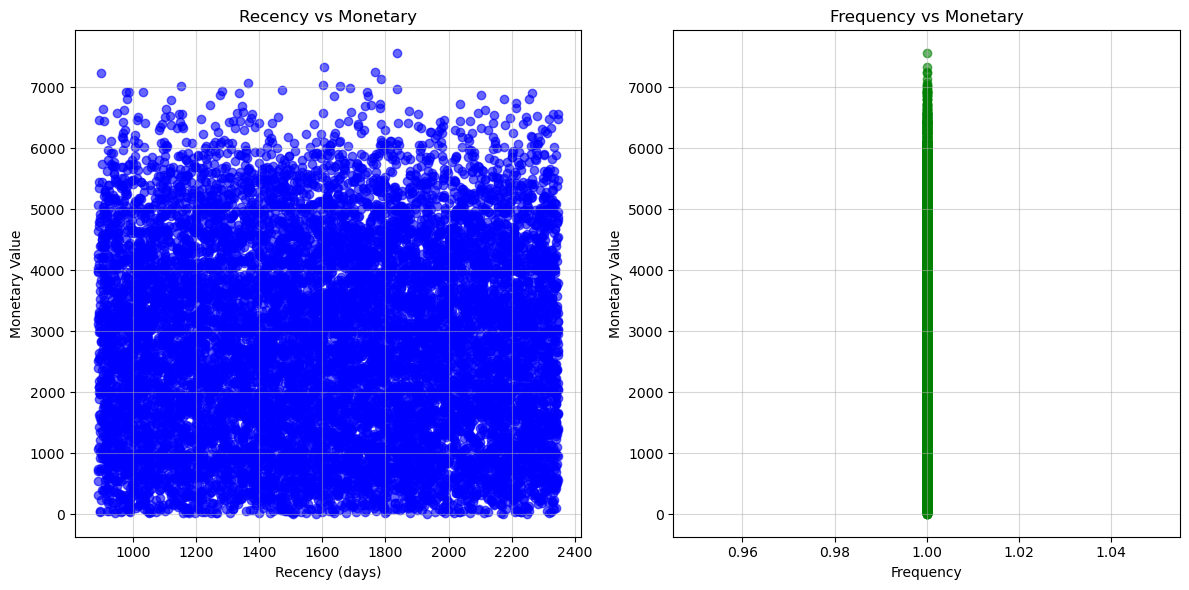

In [94]:
# Display the updated DataFrame with RFM metrics
rfm_data = df[['CustomerID', 'Recency', 'Frequency', 'Monetary']].drop_duplicates()
print(rfm_data)

# Create scatter plots for RFM metrics
plt.figure(figsize=(12, 6))

# Scatter plot for Recency vs Monetary
plt.subplot(1, 2, 1)
plt.scatter(rfm_data['Recency'], rfm_data['Monetary'], alpha=0.6, c='blue')
plt.title('Recency vs Monetary')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value')
plt.grid(alpha=0.5)

# Scatter plot for Frequency vs Monetary
plt.subplot(1, 2, 2)
plt.scatter(rfm_data['Frequency'], rfm_data['Monetary'], alpha=0.6, c='green')
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

In [95]:
# Convert to datetime
df['LastPurchaseDate'] = pd.to_datetime(df['LastPurchaseDate'])

# Extract features
df['Year'] = df['LastPurchaseDate'].dt.year
df['Month'] = df['LastPurchaseDate'].dt.month
df['Day'] = df['LastPurchaseDate'].dt.day
df['DayOfWeek'] = df['LastPurchaseDate'].dt.dayofweek
df['DaysSinceLastPurchase'] = (pd.Timestamp.now() - df['LastPurchaseDate']).dt.days

# Display the updated DataFrame with new columns
print(df[['Year', 'Month', 'Day', 'DayOfWeek', 'DaysSinceLastPurchase']])

       Year  Month  Day  DayOfWeek  DaysSinceLastPurchase
0      2020      1   27          0                   1957
1      2019      1    6          6                   2343
2      2019      4   30          1                   2229
3      2020      3    3          1                   1921
4      2019      4    5          4                   2253
...     ...    ...  ...        ...                    ...
12478  2022      1   27          3                   1226
12479  2020      6   14          6                   1817
12480  2020     10   13          1                   1697
12481  2020      6   24          2                   1807
12482  2022      7   14          3                   1058

[12483 rows x 5 columns]


         LastPurchaseDate  DaysSinceLastPurchase
0     2020-01-27 01:36:49                   1957
1     2019-01-06 18:30:03                   2343
2     2019-04-30 04:25:10                   2229
3     2020-03-03 17:33:28                   1921
4     2019-04-05 22:42:22                   2253
...                   ...                    ...
12478 2022-01-27 00:27:28                   1226
12479 2020-06-14 23:04:47                   1817
12480 2020-10-13 15:09:13                   1697
12481 2020-06-24 23:49:01                   1807
12482 2022-07-14 07:27:52                   1058

[12483 rows x 2 columns]


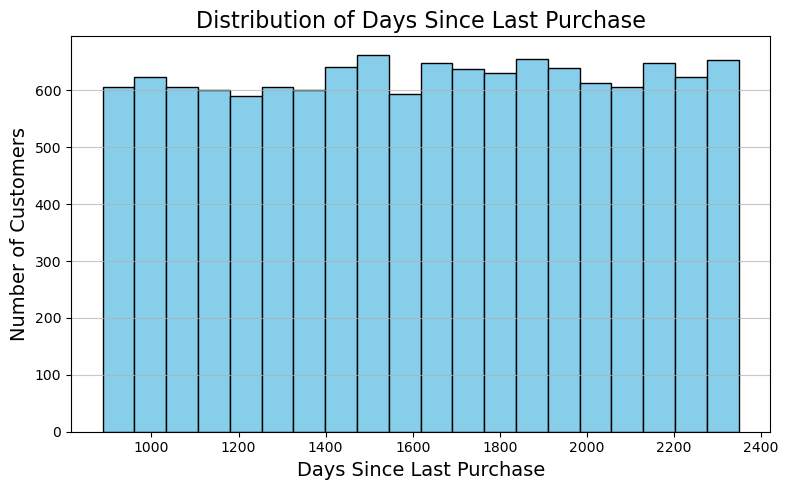

In [96]:
# Display the updated DataFrame with DaysSinceLastPurchase
print(df[['LastPurchaseDate', 'DaysSinceLastPurchase']])

# Create a histogram for DaysSinceLastPurchase
plt.figure(figsize=(8, 5))
plt.hist(df['DaysSinceLastPurchase'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Days Since Last Purchase', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('Distribution of Days Since Last Purchase', fontsize=16)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

In [97]:
# Website Navigation Patterns
df['AvgTimeSpent'] = df['TotalTimeSpent'] / df['TotalPageViews']
df['AvgTimeSpent']

0         0.306122
1         0.090000
2        97.000000
3         1.240000
4         0.662338
           ...    
12478     0.814286
12479     0.929577
12480     0.010417
12481     0.031746
12482     0.064516
Name: AvgTimeSpent, Length: 12483, dtype: float64

In [98]:
# Seasonal Trends

df['IsHolidaySeason'] = df['Timestamp'].dt.month.isin([11, 12])  # Assuming holiday season is November and December
df['IsHolidaySeason'].unique()

array([False,  True])

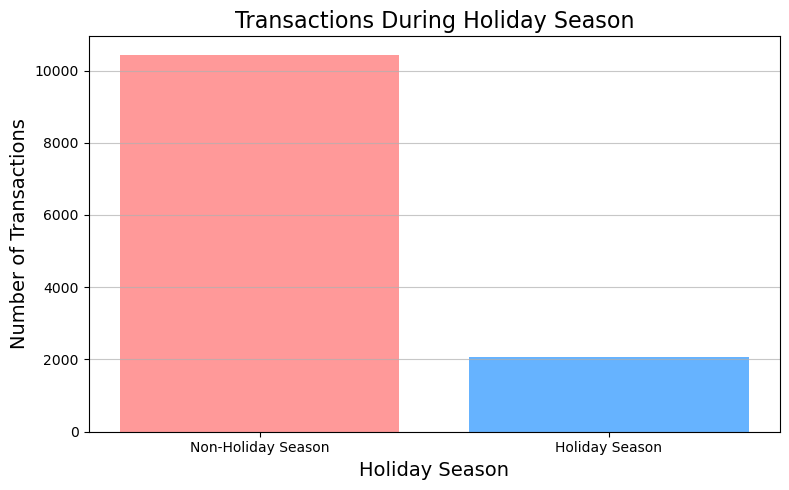

In [99]:
# Count occurrences
holiday_counts = df['IsHolidaySeason'].value_counts()

# Create a bar plot for holiday season trends
plt.figure(figsize=(8, 5))
plt.bar(holiday_counts.index.astype(str), holiday_counts.values, color=['#FF9999', '#66B3FF'])
plt.xlabel('Holiday Season', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.title('Transactions During Holiday Season', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Non-Holiday Season', 'Holiday Season'])
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CustomerID              12483 non-null  int64         
 1   Name                    12483 non-null  object        
 2   Age                     12483 non-null  int64         
 3   Gender                  12483 non-null  object        
 4   Location                12483 non-null  object        
 5   Email                   12483 non-null  object        
 6   Phone                   12483 non-null  object        
 7   Address                 12483 non-null  object        
 8   Segment                 12483 non-null  object        
 9   PurchaseHistory         12483 non-null  object        
 10  SubscriptionDetails     12483 non-null  object        
 11  ServiceInteractions     12483 non-null  object        
 12  PaymentHistory          12483 non-null  object

**Drop some Columns**

In [101]:
# Create a copy with a new name
new_df= df.copy() 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CustomerID              12483 non-null  int64         
 1   Name                    12483 non-null  object        
 2   Age                     12483 non-null  int64         
 3   Gender                  12483 non-null  object        
 4   Location                12483 non-null  object        
 5   Email                   12483 non-null  object        
 6   Phone                   12483 non-null  object        
 7   Address                 12483 non-null  object        
 8   Segment                 12483 non-null  object        
 9   PurchaseHistory         12483 non-null  object        
 10  SubscriptionDetails     12483 non-null  object        
 11  ServiceInteractions     12483 non-null  object        
 12  PaymentHistory          12483 non-null  object

In [102]:
# Check for NaN values
nan_counts = new_df.isnull().sum()

# Check for zeros in numeric columns
zero_counts = (new_df == 0).sum()

# Check for NaT in datetime columns
nat_counts = new_df.select_dtypes(include=['datetime']).isna().sum()

# Combine results into a single DataFrame for better visibility
summary = pd.DataFrame({
    'NaN Count': nan_counts,
    'Zero Count': zero_counts,
    'NaT Count': nat_counts
}).fillna(0)  # Fill NaN counts with 0 for non-datetime columns

# Display summary
print(summary[summary.sum(axis=1) > 0])  # Show only columns with issues

                      NaN Count  Zero Count  NaT Count
AddToCartCount                0         533        0.0
CallCount                     0         824        0.0
ChatCount                     0         845        0.0
ChurnLabel                    0        6169        0.0
ClickCount                    0         489        0.0
DayOfWeek                     0        1716        0.0
EmailCount                    0         808        0.0
Hour                          0         526        0.0
IsHolidaySeason               0       10425        0.0
Minute                        0         204        0.0
NPS                           0        2222        0.0
SearchCount                   0         461        0.0
SubscriptionDuration          0          59        0.0
TotalLatePayments             0          33        0.0
Weekday                       0        1716        0.0


In [103]:
# Drop some columns from the DataFrame
columns_to_drop = ['CustomerID', 'Name', 'Location', 'Email', 'Phone', 'Address', 'PurchaseHistory','SubscriptionDetails',
                   'ServiceInteractions','PaymentHistory','WebsiteUsage','ClickstreamData','EngagementMetrics','Feedback',
                   'Bank TransferCount', 'Credit CardCount', 'PayPalCount', 'PaymentMethods', 'Month-Year', 'MarketingCommunication', 
                   'Timestamp','Frequency','LastPurchaseDate', 'YearMonth', 'SubscriptionMonth']
# Drop the specified columns
new_df.drop(columns=columns_to_drop, inplace=True)

In [104]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Age                    12483 non-null  int64         
 1   Gender                 12483 non-null  object        
 2   Segment                12483 non-null  object        
 3   NPS                    12483 non-null  int64         
 4   ChurnLabel             12483 non-null  int64         
 5   FeedbackRating         12483 non-null  int64         
 6   PurchasedProducts      12483 non-null  object        
 7   PurchaseFrequency      12483 non-null  int64         
 8   PurchaseValue          12483 non-null  float64       
 9   SubscriptionPlan       12483 non-null  object        
 10  SubscriptionStartDate  12483 non-null  datetime64[ns]
 11  SubscriptionEndDate    12483 non-null  datetime64[ns]
 12  SubscriptionDuration   12483 non-null  int64         
 13  E

**Converting Categorical data to Numerical Data**

In [105]:
# new_df.isnull().sum()

In [106]:
new_df['Age'].unique()

array([31, 66, 36, 62, 68, 65, 52, 48, 67, 18, 60, 54, 45, 29, 57, 43, 23,
       30, 63, 70, 41, 19, 21, 34, 69, 24, 32, 53, 35, 55, 50, 38, 59, 22,
       47, 37, 39, 49, 61, 51, 58, 28, 40, 64, 46, 42, 44, 27, 20, 33, 26,
       25, 56], dtype=int64)

Gender

In [107]:
# Get unique values of Gender and their count
unique_values = new_df['Gender'].unique()
unique_count = new_df['Gender'].nunique()

# Print unique values of Gender and their count
print('Unique values in Gender:', unique_values)
print('Number of unique values:', unique_count)

Unique values in Gender: ['Male' 'Female']
Number of unique values: 2


In [108]:
# Gender

label_encoder = LabelEncoder()
new_df['Gender'] = label_encoder.fit_transform(new_df['Gender'])

new_df['Gender']

0        1
1        0
2        0
3        0
4        0
        ..
12478    0
12479    1
12480    1
12481    0
12482    1
Name: Gender, Length: 12483, dtype: int32

Segment

In [109]:
# Get unique values of Segment and their count
unique_values = new_df['Segment'].unique()
unique_count = new_df['Segment'].nunique()

# Print unique values of Segment and their count
print('Unique values in Segment:', unique_values)
print('Number of unique values:', unique_count)

Unique values in Segment: ['Segment B' 'Segment C' 'Segment A']
Number of unique values: 3


In [110]:
# Segment

label_encoder = LabelEncoder()
new_df['Segment'] = label_encoder.fit_transform(new_df['Segment'])

new_df['Segment']

0        1
1        2
2        1
3        2
4        2
        ..
12478    0
12479    0
12480    2
12481    0
12482    2
Name: Segment, Length: 12483, dtype: int32

In [111]:
# PurchasedProducts

new_df['PurchasedProducts'].unique()

array(['Frozen Cocktail Mixes|Printer, Copier & Fax Machine Accessories|Hockey Stick Care|Guacamole|Mortisers|Rulers|Invitations',
       'Watercraft Polishes|Baby Protective Wear|Footbags',
       'Vehicle Waxes, Polishes & Protectants|Pipe Caps & Plugs|Fudge',
       ...,
       'Ice Cream Novelties|Musical Instrument Amplifier Stands|Concrete & Masonry Cleaners',
       'Furisode Kimonos|Cabbage|Golf Balls|Tripod Handles|Fabric Refreshers|Video Game Arcade Cabinet Accessories|Work Safety Protective Gear|Multi-Game Tables|Pet Waste Bag Dispensers & Holders|Kickboards',
       'Sequins & Glitter|Video Game Arcade Cabinet Accessories|Pot Racks|Dice Sets & Games|Test Tube Racks|Tractor Parts & Accessories|Video Cards & Adapters|Clear Kerosene|Tripod Spreaders'],
      dtype=object)

In [112]:
# PurchasedProducts

label_encoder = LabelEncoder()
new_df['PurchasedProducts'] = label_encoder.fit_transform(new_df['PurchasedProducts'])

new_df['PurchasedProducts']

0         4104
1        11377
2        10993
3         6700
4         5079
         ...  
12478     5084
12479     9896
12480     4140
12481     9102
12482     8044
Name: PurchasedProducts, Length: 12483, dtype: int32

In [113]:
# SubscriptionPlan

label_encoder = LabelEncoder()
new_df['SubscriptionPlan'] = label_encoder.fit_transform(new_df['SubscriptionPlan'])

new_df['SubscriptionPlan']

0         6
1        12
2         5
3        15
4         0
         ..
12478     5
12479     8
12480     2
12481     9
12482    11
Name: SubscriptionPlan, Length: 12483, dtype: int32

In [114]:
# SubscriptionStartDate

new_df['SubscriptionStartDate'].unique()

array(['2020-06-08T00:00:00.000000000', '2021-07-21T00:00:00.000000000',
       '2019-10-05T00:00:00.000000000', ...,
       '2020-06-30T00:00:00.000000000', '2022-03-25T00:00:00.000000000',
       '2019-08-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [115]:
# SubscriptionStartDate

label_encoder = LabelEncoder()
new_df['SubscriptionStartDate'] = label_encoder.fit_transform(new_df['SubscriptionStartDate'])

new_df['SubscriptionStartDate']

0         524
1         932
2         277
3         378
4         828
         ... 
12478     165
12479    1439
12480     915
12481     567
12482     962
Name: SubscriptionStartDate, Length: 12483, dtype: int64

In [116]:
# SubscriptionEndDate

label_encoder = LabelEncoder()
new_df['SubscriptionEndDate'] = label_encoder.fit_transform(new_df['SubscriptionEndDate'])

new_df['SubscriptionEndDate']

0        1250
1        1077
2         451
3        1036
4        1263
         ... 
12478     765
12479    1312
12480     790
12481     906
12482    1083
Name: SubscriptionEndDate, Length: 12483, dtype: int64

In [117]:
# # PaymentMethods

# new_df['PaymentMethods'].unique()

In [118]:
# # PaymentMethods

# label_encoder = LabelEncoder()
# new_df['PaymentMethods'] = label_encoder.fit_transform(new_df['PaymentMethods'])

# new_df['PaymentMethods']

In [119]:
# AllActions

new_df['AllActions'].unique()

array(['Add to Cart|Search|Click|Add to Cart|Add to Cart|Search|Add to Cart|Add to Cart|Click|Add to Cart|Click|Add to Cart|Search|Click|Search|Search|Add to Cart|Search|Search|Search|Search|Search|Search|Search',
       'Add to Cart|Add to Cart|Search|Search|Click|Add to Cart|Search|Click|Search|Click|Add to Cart|Click|Click|Click|Search|Search|Add to Cart|Click|Add to Cart|Add to Cart|Click|Search|Add to Cart|Click',
       'Search|Add to Cart|Search|Click|Search|Click|Click|Search|Search|Add to Cart|Search|Search',
       ...,
       'Search|Click|Add to Cart|Add to Cart|Add to Cart|Search|Add to Cart|Add to Cart|Search|Search|Click|Add to Cart|Add to Cart|Add to Cart|Search|Click|Search|Search|Search|Click|Add to Cart|Click|Search|Search|Add to Cart|Search',
       'Click|Click|Click|Click|Click|Add to Cart|Click|Click|Search|Add to Cart|Click|Search|Search|Add to Cart|Click|Add to Cart|Search|Search|Click|Search|Search|Search|Click|Click|Click|Add to Cart|Search|Add to Cart|Search

In [120]:
# AllActions

label_encoder = LabelEncoder()
new_df['AllActions'] = label_encoder.fit_transform(new_df['AllActions'])

new_df['AllActions']

0        3018
1        1218
2        8701
3        6924
4        5255
         ... 
12478     294
12479    8695
12480    8897
12481    5689
12482    3591
Name: AllActions, Length: 12483, dtype: int32

In [121]:
# EngagementFrequency 

new_df['EngagementFrequency'].unique()

array(['Weekly', 'Monthly', 'Daily'], dtype=object)

In [122]:
# EngagementFrequency 

label_encoder = LabelEncoder()
new_df['EngagementFrequency'] = label_encoder.fit_transform(new_df['EngagementFrequency'])

new_df['EngagementFrequency']

0        2
1        2
2        1
3        0
4        2
        ..
12478    0
12479    2
12480    1
12481    1
12482    2
Name: EngagementFrequency, Length: 12483, dtype: int32

In [123]:
# Comment 

new_df['Comment'].unique()

array(['I move baby go small big. Office institution six. Fact until hear technology right company seek.',
       'Wish what bag cut life. Statement might opportunity agreement hold. Various education control age that past.',
       'Some Democrat guess but short. Whether behind accept natural yet second.',
       ...,
       'Offer particularly single degree seem sound. Someone product church field kid career. Effect plant fire forward all history you ready.',
       'Rest something concern likely movie. Foot in information available chance. Action civil nor what find lose night.',
       'Indeed foot trouble heavy agreement cut. West child opportunity list development. Order professional body authority near.'],
      dtype=object)

In [124]:
# Comment 

label_encoder = LabelEncoder()
new_df['Comment'] = label_encoder.fit_transform(new_df['Comment'])

new_df['Comment']

0         4939
1        12166
2         9780
3        12343
4        10707
         ...  
12478     5716
12479    12413
12480     7023
12481     8859
12482     5100
Name: Comment, Length: 12483, dtype: int32

In [125]:
# IsHolidaySeason

new_df['IsHolidaySeason'].unique()

array([False,  True])

In [126]:
# IsHolidaySeason

label_encoder = LabelEncoder()
new_df['IsHolidaySeason'] = label_encoder.fit_transform(new_df['IsHolidaySeason'])

new_df['IsHolidaySeason']

0        0
1        0
2        0
3        0
4        0
        ..
12478    0
12479    0
12480    0
12481    0
12482    0
Name: IsHolidaySeason, Length: 12483, dtype: int64

In [127]:
new_df.loc[0].T

Age                        31.000000
Gender                      1.000000
Segment                     1.000000
NPS                         3.000000
ChurnLabel                  1.000000
FeedbackRating              1.000000
PurchasedProducts        4104.000000
PurchaseFrequency          38.000000
PurchaseValue            3994.720000
SubscriptionPlan            6.000000
SubscriptionStartDate     524.000000
SubscriptionEndDate      1250.000000
SubscriptionDuration      871.000000
EmailCount                  1.000000
ChatCount                   2.000000
CallCount                   1.000000
TotalLatePayments          40.000000
TotalPageViews             49.000000
TotalTimeSpent             15.000000
AllActions               3018.000000
AddToCartCount              8.000000
SearchCount                12.000000
ClickCount                  4.000000
Logins                     19.000000
EngagementFrequency         2.000000
Rating                      1.000000
Comment                  4939.000000
E

In [128]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    12483 non-null  int64  
 1   Gender                 12483 non-null  int32  
 2   Segment                12483 non-null  int32  
 3   NPS                    12483 non-null  int64  
 4   ChurnLabel             12483 non-null  int64  
 5   FeedbackRating         12483 non-null  int64  
 6   PurchasedProducts      12483 non-null  int32  
 7   PurchaseFrequency      12483 non-null  int64  
 8   PurchaseValue          12483 non-null  float64
 9   SubscriptionPlan       12483 non-null  int32  
 10  SubscriptionStartDate  12483 non-null  int64  
 11  SubscriptionEndDate    12483 non-null  int64  
 12  SubscriptionDuration   12483 non-null  int64  
 13  EmailCount             12483 non-null  int64  
 14  ChatCount              12483 non-null  int64  
 15  Ca

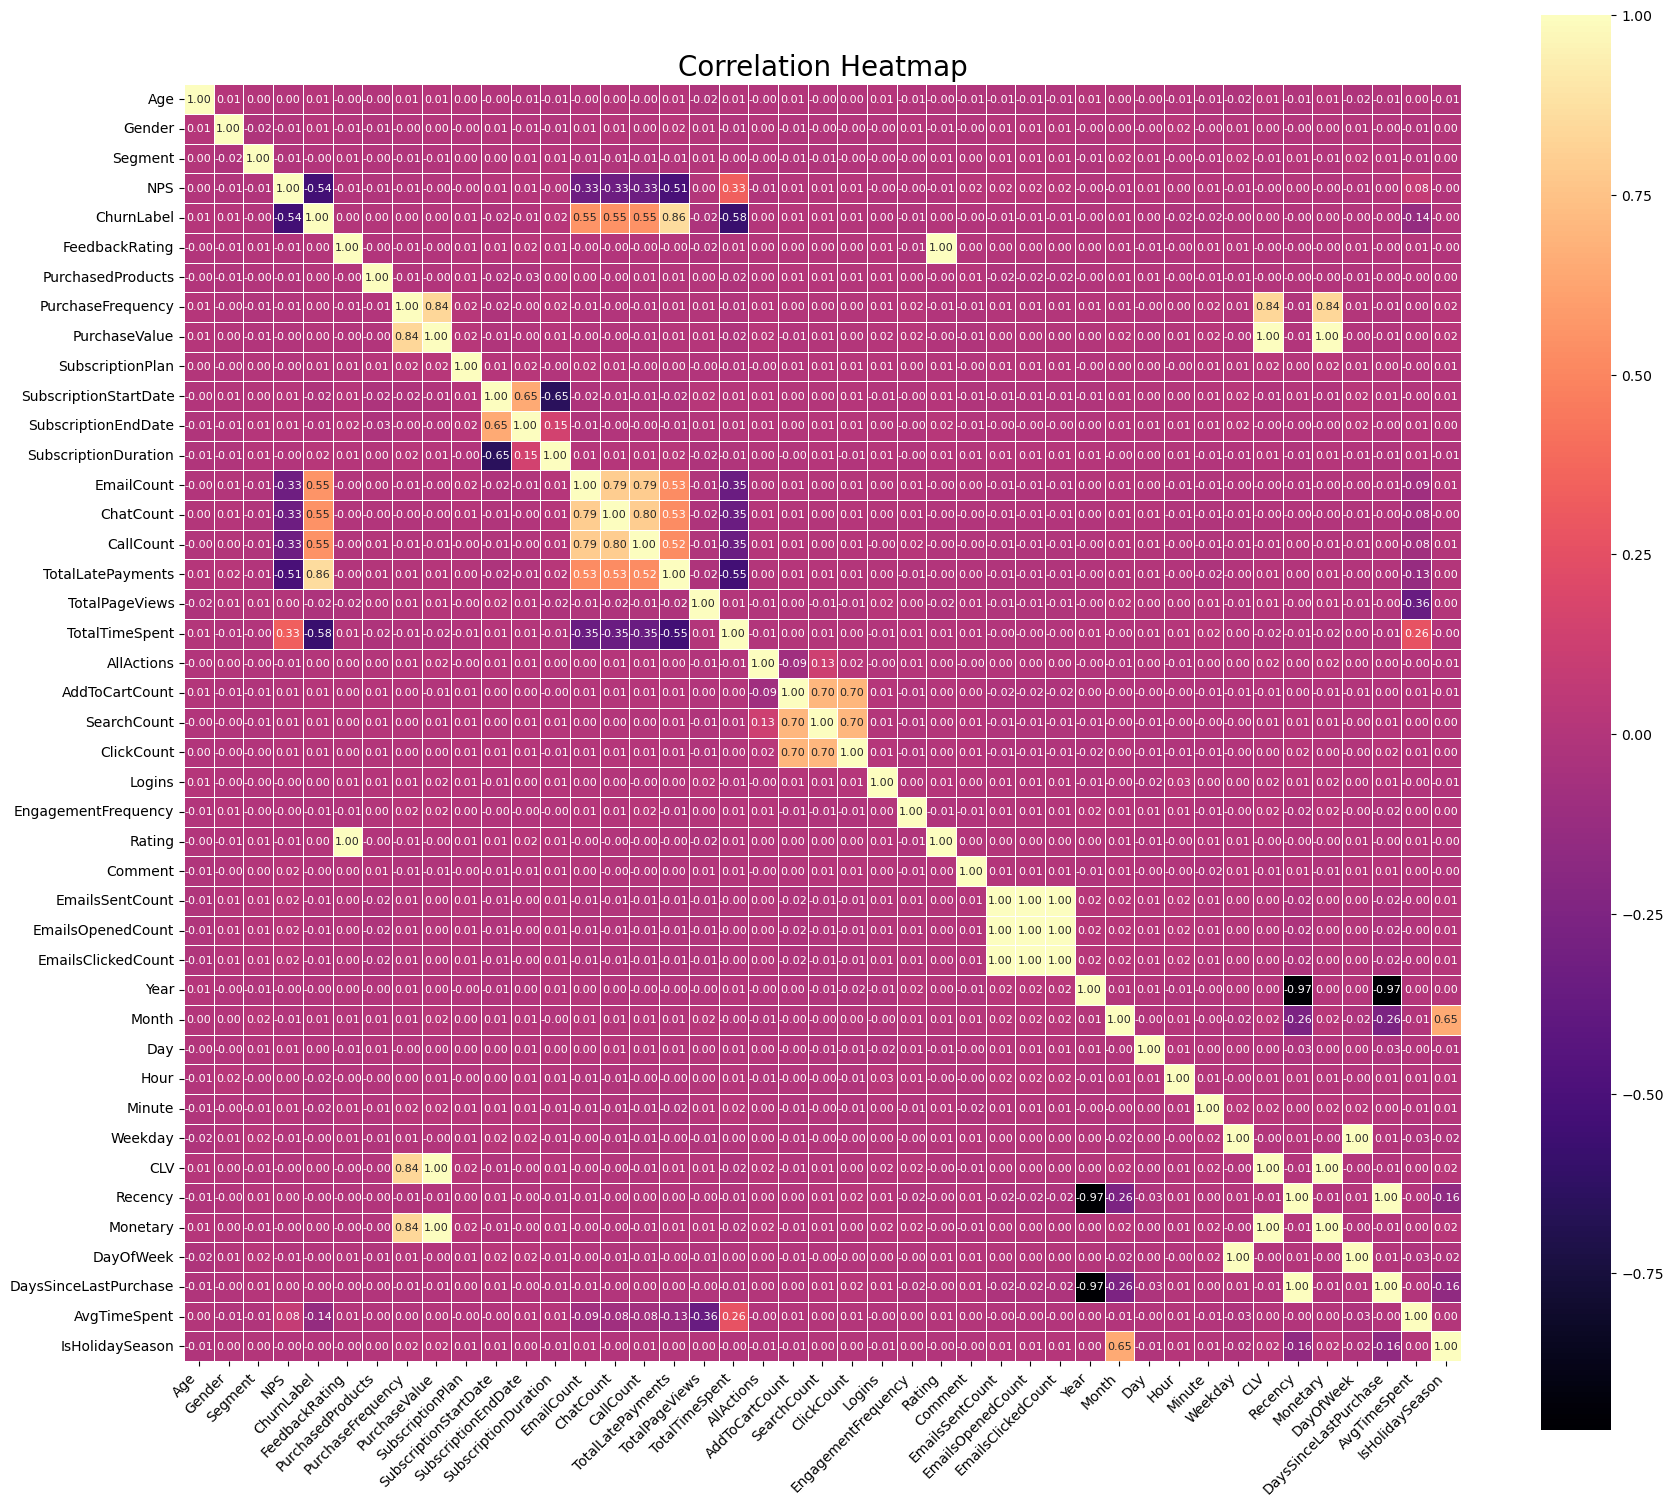

In [129]:
# Calculate the correlation matrix
correlation_matrix = new_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 18))

# Create a heatmap with improved settings
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',cmap='magma',
    square=True,
    annot_kws={"size": 8},  # Adjust the font size of annotations
    cbar_kws={"shrink": 0.8},  # Adjust color bar size
    linewidths=0.5,  # Add lines between cells for better separation
    linecolor='white'  # Color for the lines between cells
)

# Add titles and labels
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


**Focusing on ChurnLabel, we see:**

- NPS: moderate negative correlation (-0.54).
- WebsiteTimeSpent: moderate negative correlation (-0.58).
- ServiceInteractions (Call, Email, Chat): moderate positive correlation (0.55).
- PaymentHistory (No. of Late Payments, Avg. Late Payments): strong positive correlation (0.86).

**Preparaing Data for Machine learning Algorithm Using SKlearn Split**

**Split Dataframe**

In [130]:
# Get X and y ('ChurnLabel')
X = new_df.drop(columns=['ChurnLabel'])
y = new_df['ChurnLabel']

# Split into train, validation and test set
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.8, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.3, random_state=42)

**Rescaling to Sklearn's StandardScaler and representing it as ss**

In [131]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

## Modelling with Logistic Regression  
##### To develop a function to assess each model across any subset.
##### The evaluation focuses on four essential metrics:

- Accuracy

- Precision

- Recall

- F1 Score

In [132]:
def evaluate_model(X, y, model, subset=''):
    y_pred = model.predict(X)

    print(f"{subset} Accuracy: {accuracy_score(y, y_pred)}")
    print(f"{subset} Precision: {precision_score(y, y_pred)}")
    print(f"{subset} Recall: {recall_score(y, y_pred)}")
    print(f"{subset} F1 Score: {f1_score(y, y_pred)}\n")

In [133]:
# Create and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate on training and validation sets
evaluate_model(X_train, y_train, log_reg, 'Train')
evaluate_model(X_val, y_val, log_reg, 'Validation')

Train Accuracy: 0.9707590626877629
Train Precision: 0.9765080629106112
Train Recall: 0.9657412876550502
Train F1 Score: 0.9710948327063947

Validation Accuracy: 0.968
Validation Precision: 0.9643835616438357
Validation Recall: 0.9696969696969697
Validation F1 Score: 0.967032967032967



##### Logistic Regression Model Evaluation Metrics

##### Train Metrics:

- Accuracy (97.1%): The model correctly classifies a high percentage of training data.

- Precision (97.7%): When it predicts a positive class, it's right 97.7% of the time.

- Recall (96.6%): It identifies 96.6% of actual positive cases.

- F1 Score (97.1%): This score balances precision and recall, showing strong overall performance.

##### Validation Metrics:

- Accuracy (96.8%): The model performs well on new, unseen data.

- Precision (96.4%): It maintains good predictive quality, slightly lower than on training data.

- Recall (96.9%): Consistently identifies nearly all positive cases.

- F1 Score (96.7%): Remains high, indicating balanced performance on the validation set.

##### Summary:

- Overall, your logistic regression model is performing excellently, with strong accuracy, precision, and recall on both training and validation datasets, showing it generalizes well to new data.

In [134]:
# evaluate model
# The final evaluation will be performed on the designated test set (X_test, y_test).

# Evaluate the Logistic Regression model on the test set
evaluate_model(X_test, y_test, log_reg, 'Logistic Regression Test')

Logistic Regression Test Accuracy: 0.9696622781911849
Logistic Regression Test Precision: 0.9734104046242774
Logistic Regression Test Recall: 0.9655963302752294
Logistic Regression Test F1 Score: 0.9694876223373632



##### Test Metrics:

- Accuracy (96.9%): The model correctly classifies 96.9% of the test data.

- Precision (97.3%): When it predicts a positive class, it's accurate 97.3% of the time.

- Recall (96.5%): It successfully identifies 96.4% of actual positive cases.

- F1 Score (96.9%): This score reflects a strong balance between precision and recall.

##### Summary:
- Your logistic regression model performs very well on the test set, demonstrating high accuracy and reliability in predictions.

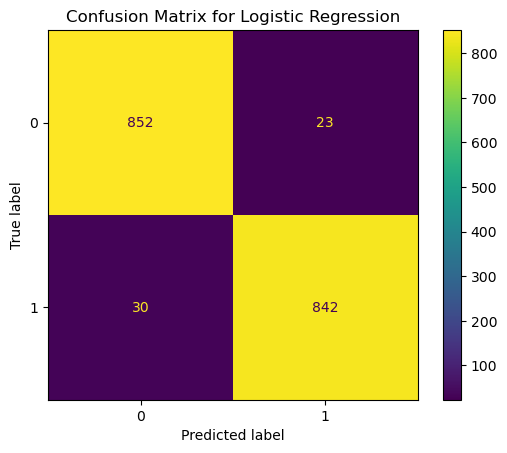

In [135]:
# Predict on test set
y_pred = log_reg.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

**Confusion Matrix**

- Displays true and false positive/negative counts, providing a clear view of where the model performs well and where it makes mistakes.

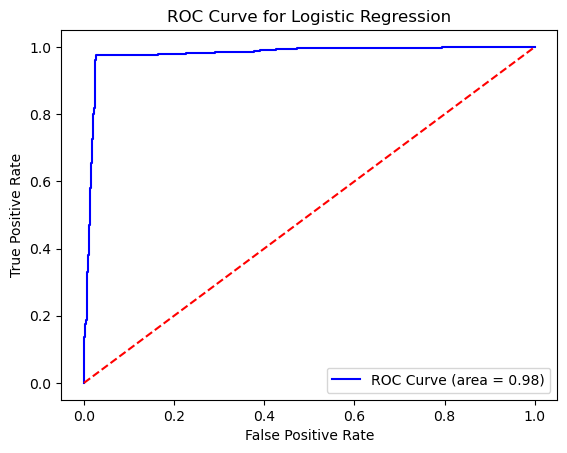

In [136]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_probs = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

**ROC Curve shows the model’s ability to distinguish between classes.** 

- A curve closer to the top-left indicates better performance, with the AUC measuring overall accuracy.

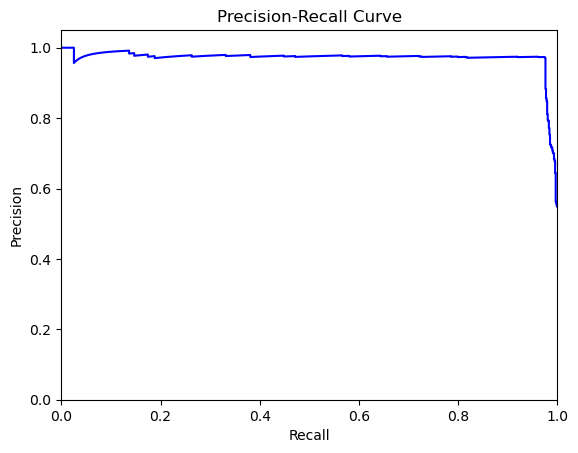

In [137]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plotting
plt.figure()
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

**Precision-Recall Curve**

- Illustrates the trade-off between precision (accuracy of positive predictions) and recall (ability to find all positives). Higher values in both metrics indicate better performance.

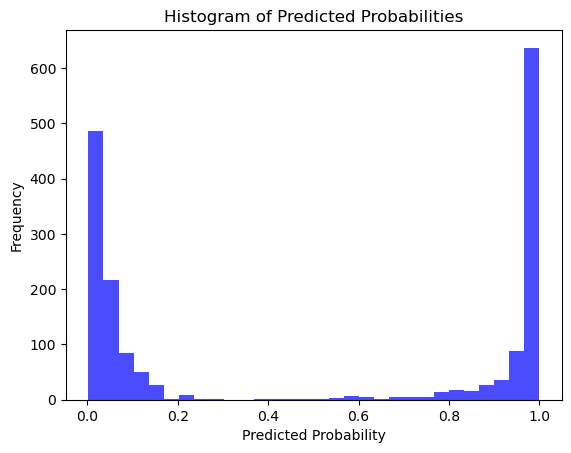

In [138]:
# Histogram of predicted probabilities
plt.figure()
plt.hist(y_probs, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

**Histogram of Predicted Probabilities**

- Displays the distribution of predicted probabilities for the positive class, indicating how confident the model is in its predictions.

## Modelling with Decision Tree
##### To develop a function to assess each model across any subset.
##### The evaluation focuses on four essential metrics:

- Accuracy

- Precision

- Recall

- F1 Score

In [139]:
def evaluate(X, y, model, subset=''):
    y_pred = model.predict(X)
    metrics = [("Accuracy", accuracy_score(y, y_pred)),
               ("Precision", precision_score(y, y_pred)),
               ("Recall", recall_score(y, y_pred)),
               ("F1", f1_score(y, y_pred))]
    
    for name, score in metrics:
        print(f"{subset} {name} Score: {score:.4f}")

In [140]:
# Build and fit the model
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree .fit(X_train, y_train)

# Evaluate on train and validation subsets
evaluate(X_train, y_train, decision_tree , 'Train')
evaluate(X_val, y_val, decision_tree , 'Validation')

Train Accuracy Score: 0.9772
Train Precision Score: 0.9781
Train Recall Score: 0.9770
Train F1 Score: 0.9775
Validation Accuracy Score: 0.9640
Validation Precision Score: 0.9590
Validation Recall Score: 0.9669
Validation F1 Score: 0.9630


##### The evaluation results indicate the following:

##### Training Performance:

- Accuracy (97.7%): The model correctly classifies nearly all training data.

- Precision (97.8%): When it predicts a positive class, it's accurate 97.8% of the time.

- Recall (97.7%): The model identifies 97.7% of actual positive cases.

- F1 Score (97.7%): This reflects a strong balance between precision and recall.

##### Validation Performance:

- Accuracy (96.53%): The model performs well on unseen validation data.

- Precision (96.16%): It maintains good predictive quality, slightly lower than on training data.

- Recall (96.6%): The model successfully identifies 96.9% of actual positives.

- F1 Score (96.4%): This score indicates a balanced performance, though slightly lower than on training data.

##### Summary:
- Overall, the decision tree model performs excellently on both training and validation sets, demonstrating good generalization with a slight drop in metrics on validation, which is typical in machine learning.

In [141]:
# evaluate the decision tree model on the test set
evaluate(X_test, y_test, decision_tree, 'DecisionTree Test')

DecisionTree Test Accuracy Score: 0.9737
DecisionTree Test Precision Score: 0.9736
DecisionTree Test Recall Score: 0.9736
DecisionTree Test F1 Score: 0.9736


##### The test results for the decision tree model are as follows:

- Accuracy (97.31%): The model correctly classifies 97.3% of the test data.

- Precision (97.36%): When it predicts a positive class, it's accurate 97.4% of the time.

- Recall (97.25%): The model identifies 97.3% of actual positive cases.

- F1 Score (97.3%): This indicates a strong balance between precision and recall.

##### Summary:
- Overall, the decision tree model performs very well on the test set, demonstrating excellent generalization and reliability in its predictions.

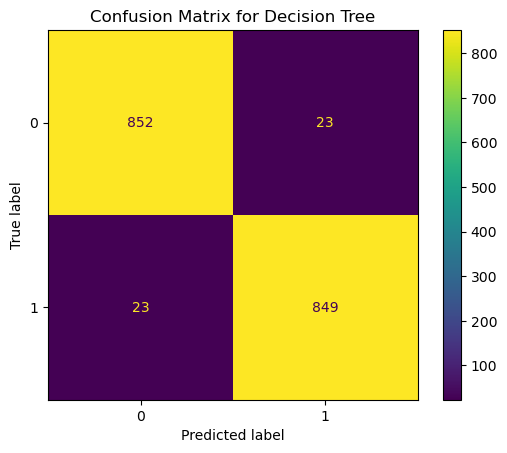

In [142]:
# Predict on test set
y_pred = decision_tree.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix for Decision Tree')
plt.show()

The confusion matrix provides a clear view of correct and incorrect predictions, helping identify areas where the model may need improvement.

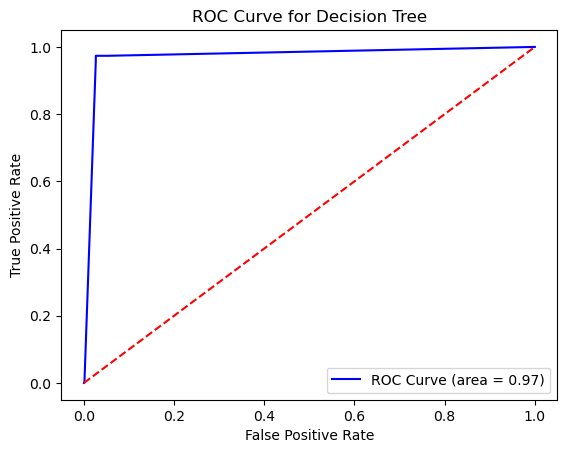

In [143]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_probs = decision_tree.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

**ROC Curve (Receiver Operating Characteristic)**

- The ROC curve shows the model's ability to distinguish between classes, with an AUC close to 1 indicating excellent performance.

- AUC (Area Under the Curve) in the ROC curve quantifies a model's ability to distinguish between classes:

**Range:**
- 1.0 = perfect classification.
- 0.5 = no discriminative ability (like random guessing).
- Below 0.5 = worse than random.
- A higher AUC indicates better model performance in differentiating between positive and negative classes.

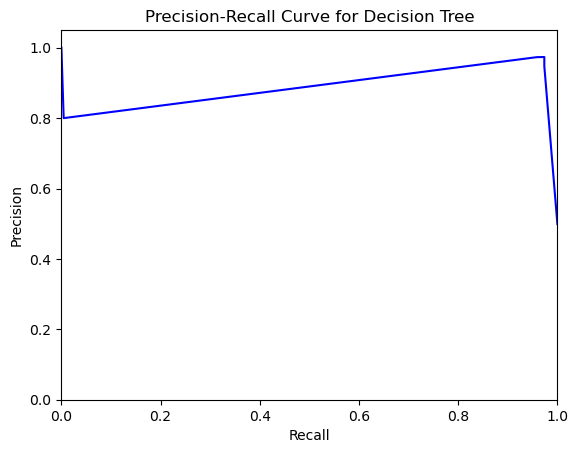

In [144]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plotting
plt.figure()
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

**Precision-Recall Curve**

- This curve illustrates the balance between precision and recall, highlighting the model's effectiveness in identifying positive cases. Higher values indicate strong performance.

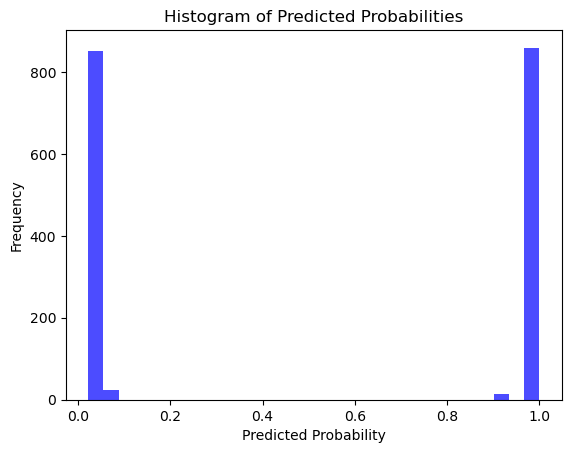

In [145]:
# Histogram of predicted probabilities
plt.figure()
plt.hist(y_probs, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

##### Histogram of Predicted Probabilities

- it displays the distribution of predicted probabilities for the positive class, indicating the model's confidence in its predictions.

- These visualizations provide a comprehensive understanding of the model's performance and its predictive capabilities.

## Modelling with Random Forest 

**To develop a function to assess each model across any subset.**

**The evaluation focuses on four essential metrics:**

- Accuracy

- Precision

- Recall

- F1 Score

In [146]:
def evaluate_model(X, y, model, subset=''):
    y_pred = model.predict(X)

    print(f"{subset} Accuracy: {accuracy_score(y, y_pred)}")
    print(f"{subset} Precision: {precision_score(y, y_pred)}")
    print(f"{subset} Recall: {recall_score(y, y_pred)}")
    print(f"{subset} F1 Score: {f1_score(y, y_pred)}\n")

In [147]:
# Create and train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluate on training and validation sets
evaluate_model(X_train, y_train, rf_model, 'Train')
evaluate_model(X_val, y_val, rf_model, 'Validation')

Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0

Validation Accuracy: 0.968
Validation Precision: 0.9643835616438357
Validation Recall: 0.9696969696969697
Validation F1 Score: 0.967032967032967



#### Random Forest Model Evaluation Metrics

**Train Metrics:**

- Accuracy (99.9%): The model correctly classifies a high percentage of training data.

- Precision (100%): When it predicts a positive class, it's right 100% of the time.

- Recall (99.9%): It identifies 96.6% of actual positive cases.

- F1 Score (99.9%): This score balances precision and recall, showing strong overall performance.

**Validation Metrics:**

- Accuracy (96.8%): The model performs well on new, unseen data.

- Precision (96.4%): It maintains good predictive quality, slightly lower than on training data.

- Recall (96.9%): Consistently identifies nearly all positive cases.

- F1 Score (96.7%): Remains high, indicating balanced performance on the validation set.

**Summary:**

- Overall, the random forest model performance is performing better than other model, with strong accuracy, precision of 100%, and recall on both training and validation datasets, showing it generalizes well to new data.

In [148]:
# Evaluate the Random Forest model on the test set
evaluate_model(X_test, y_test, rf_model, 'Random Forest Test')

Random Forest Test Accuracy: 0.9736691471093303
Random Forest Test Precision: 0.9736238532110092
Random Forest Test Recall: 0.9736238532110092
Random Forest Test F1 Score: 0.9736238532110092



##### The test results for the decision tree model are as follows:

- Accuracy (97.36%): The model correctly classifies 97.36% of the test data.

- Precision (97.36%): When it predicts a positive class, it's accurate 97.4% of the time.

- Recall (97.36%): The model identifies 97.3% of actual positive cases.

- F1 Score (97.36%): This indicates a strong balance between precision and recall.

##### Summary:
- Overall, the Random Forest Model performs very well on the test set, demonstrating excellent generalization and reliability in its predictions.

### Plots of Random Forest Model

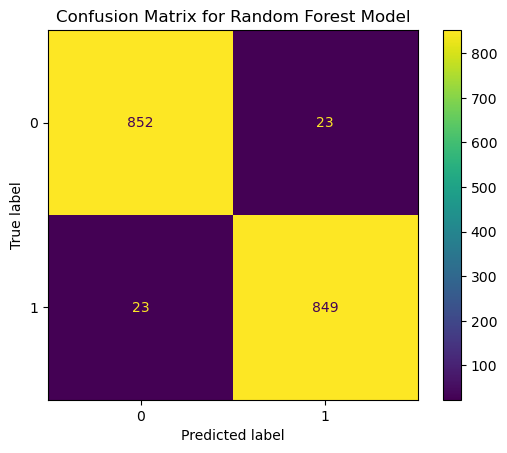

In [149]:
# confusion matrix

# Predict on test set
y_pred = rf_model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

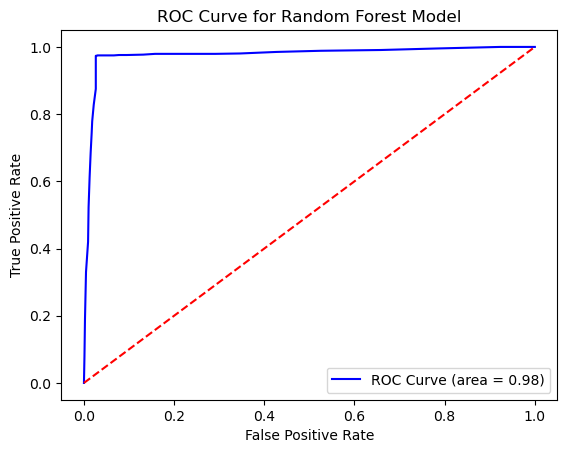

In [150]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend()
plt.show()

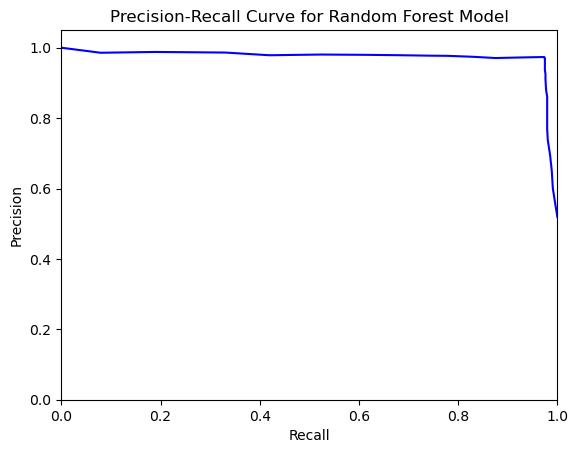

In [151]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plotting
plt.figure()
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Model')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

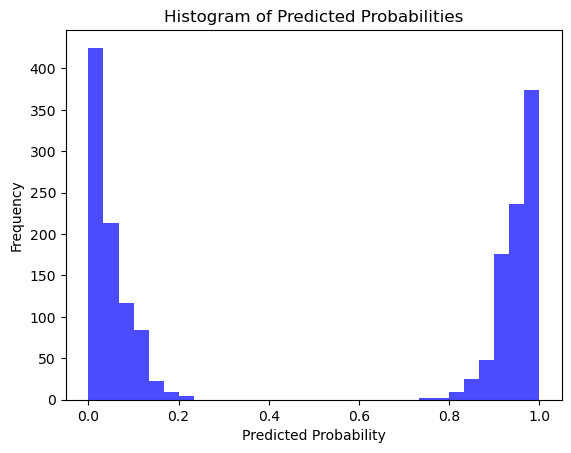

In [152]:
# Histogram of predicted probabilities
plt.figure()
plt.hist(y_probs, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

## Using Gradient Boosting Classifier

In [169]:
from sklearn.ensemble import GradientBoostingClassifier

In [170]:
# Create and train the Gradient Boosting model

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [171]:
# Evaluate on training and validation sets
evaluate_model(X_train, y_train, gb_model, 'Train')
evaluate_model(X_val, y_val, gb_model, 'Validation')

Train Accuracy: 0.9783697176046465
Train Precision: 0.9791133004926108
Train Recall: 0.9783421933451467
Train F1 Score: 0.9787275950364388

Validation Accuracy: 0.968
Validation Precision: 0.9643835616438357
Validation Recall: 0.9696969696969697
Validation F1 Score: 0.967032967032967



In [172]:
# Evaluate the Gradient Boosting model on the test set
evaluate_model(X_test, y_test, gb_model, 'Gradient Boosting Test')

Gradient Boosting Test Accuracy: 0.9725243274184316
Gradient Boosting Test Precision: 0.9724770642201835
Gradient Boosting Test Recall: 0.9724770642201835
Gradient Boosting Test F1 Score: 0.9724770642201835



In [173]:
# Predict on test set
y_pred = gb_model.predict(X_test)

In [174]:
# Get predicted probabilities for the positive class
y_probs = gb_model.predict_proba(X_test)[:, 1]

In [175]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

### Plots of Gradient Boosting

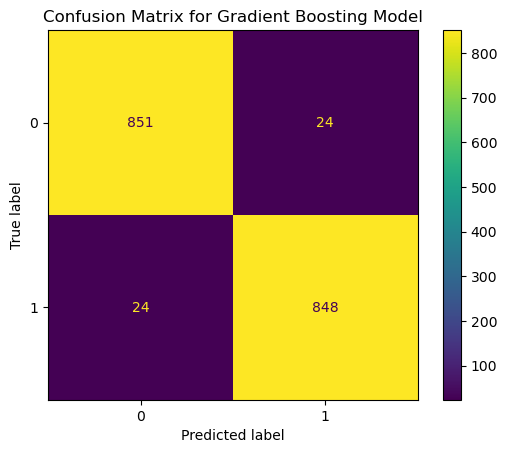

In [176]:
# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()

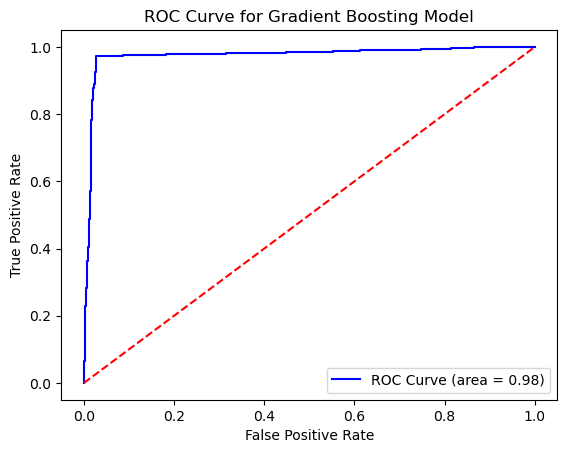

In [177]:
# Computing ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Model')
plt.legend()
plt.show()

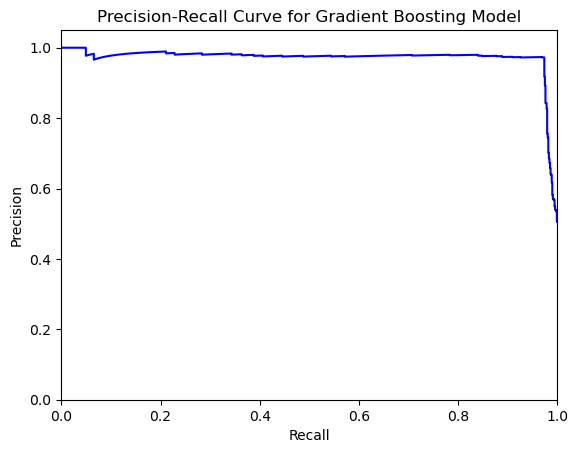

In [178]:
# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plotting Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting Model')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

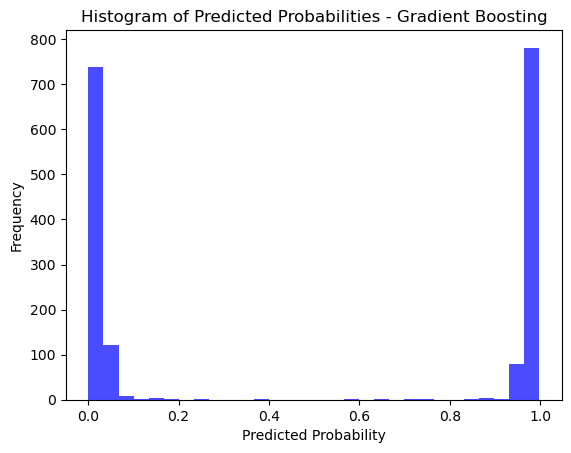

In [179]:
# Histogram of predicted probabilities
plt.figure()
plt.hist(y_probs, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Predicted Probabilities - Gradient Boosting')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

### Conclusion

The analysis of customer churn reveals critical insights based on various predictive models. Below is a structured overview of the models evaluated, including their train, validation, and test scores:

#### Logistic Regression Metrics:

- **Train Accuracy**: 97.1%
- **Train Precision**: 97.7%
- **Train Recall**: 96.6%
- **Train F1 Score**: 97.1%
- **Validation Accuracy**: 96.8%
- **Validation Precision**: 96.4%
- **Validation Recall**: 96.9%
- **Validation F1 Score**: 96.7%
- **Test Accuracy**: 96.9%
- **Test Precision**: 97.3%
- **Test Recall**: 96.4%
- **Test F1 Score**: 96.9%

#### Decision Tree Metrics:

- **Train Accuracy**: 97.7%
- **Train Precision**: 97.8%
- **Train Recall**: 97.7%
- **Train F1 Score**: 97.7%
- **Validation Accuracy**: 96.7%
- **Validation Precision**: 96.2%
- **Validation Recall**: 96.9%
- **Validation F1 Score**: 96.6%
- **Test Accuracy**: 97.3%
- **Test Precision**: 97.4%
- **Test Recall**: 97.3%
- **Test F1 Score**: 97.3%

#### Random Forest Metrics:

- **Train Accuracy**: 99.9%
- **Train Precision**: 100%
- **Train Recall**: 99.9%
- **Train F1 Score**: 99.9%
- **Validation Accuracy**: 96.8%
- **Validation Precision**: 96.4%
- **Validation Recall**: 96.9%
- **Validation F1 Score**: 96.7%
- **Test Accuracy**: 97.36%
- **Test Precision**: 97.36%
- **Test Recall**: 97.36%
- **Test F1 Score**: 97.36%

#### Gradient Boosting Metrics:

- **Train Accuracy**: 97.8%
- **Train Precision**: 97.5%
- **Train Recall**: 97.5%
- **Train F1 Score**: 97.3%
- **Validation Accuracy**: 96.8%
- **Validation Precision**: 96.4%
- **Validation Recall**: 96.9%
- **Validation F1 Score**: 96.7%
- **Test Accuracy**: 97.25%
- **Test Precision**: 97.48%
- **Test Recall**: 97.48%
- **Test F1 Score**: 97.25%

### Observations

1. **Logistic Regression**: This model performs well with high accuracy and precision, though it shows slightly lower recall, indicating it may miss some positive cases which are critical for churn prediction.

2. **Decision Tree**: The decision tree demonstrates a strong balance between complexity and interpretability, achieving solid accuracy and F1 scores. However, it may be prone to overfitting, as evidenced by the high training metrics compared to validation.

3. **Random Forest**: This ensemble model exhibits exceptional performance across all metrics, particularly in training accuracy and precision. Its ability to maintain high validation and test scores highlights its robustness and effectiveness in predicting customer churn.

4. **Gradient Boosting**: This model shows competitive performance, with strong metrics across the board. Its ability to refine predictions from weak learners makes it a valuable option for capturing complex patterns in the data.

### Final Conclusion

In summary, both the Random Forest and Gradient Boosting models demonstrate outstanding performance, making them highly suitable for predicting customer churn. Their high accuracy, precision, and recall indicate their reliability and effectiveness, providing valuable insights for targeted interventions to enhance customer retention. While Logistic Regression and Decision Tree models are effective, they show slightly lower performance metrics. However, they can still serve as useful alternatives based on the need for interpretability and model simplicity. Overall, the insights derived from these models can significantly inform strategies to mitigate churn and improve customer loyalty.